In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
import icd9cms.icd9 as icd9
import os
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Loading the datasets

In [2]:
# Training datasets:

train_beneficiary = pd.read_csv('../data/Train_Beneficiarydata.csv')
train_inpatient = pd.read_csv('../data/Train_Inpatientdata.csv')
train_outpatient = pd.read_csv('../data/Train_Outpatientdata.csv')
train_labels = pd.read_csv('../data/Train_labels.csv')

# Test datasets:
test_beneficiary = pd.read_csv('../data/Test_Beneficiarydata.csv')
test_inpatient = pd.read_csv('../data/Test_Inpatientdata.csv')
test_outpatient = pd.read_csv('../data/Test_Outpatientdata.csv')
test_labels = pd.read_csv('../data/Test_labels.csv')

# Datasets Sanity Check

In [3]:
print ("Training Data Shapes:")
print ("  Training Beneficiary Data Shape:", train_beneficiary.shape)
print ("  Training Inpatient Data Shape:", train_inpatient.shape)
print ("  Training Outpatient Data Shape:", train_outpatient.shape)
print ("  Training Labels Data Shape:", train_labels.shape)
print()
print ("Test Data Shapes:")
print ("  Test Beneficiary Data Shape:", test_beneficiary.shape)
print ("  Test Inpatient Data Shape:", test_inpatient.shape)
print ("  Test Outpatient Data Shape:", test_outpatient.shape)
print ("  Test Labels Data Shape:", test_labels.shape)

Training Data Shapes:
  Training Beneficiary Data Shape: (138556, 25)
  Training Inpatient Data Shape: (40474, 30)
  Training Outpatient Data Shape: (517737, 27)
  Training Labels Data Shape: (5410, 2)

Test Data Shapes:
  Test Beneficiary Data Shape: (63968, 25)
  Test Inpatient Data Shape: (9551, 30)
  Test Outpatient Data Shape: (125841, 27)
  Test Labels Data Shape: (1353, 1)


## Checking for missing values

In [4]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Create summary table
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'}
    )

    # Filter only columns that have missing values
    mis_val_table = mis_val_table[mis_val_table['Missing Values'] > 0]

    # Check if nothing is missing
    if mis_val_table.empty:
        print(f"This dataframe has {df.shape[1]} columns and {df.shape[0]} rows.")
        return "✔ No missing values found in any column."

    # Otherwise, sort and print summary
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    print(f"This dataframe has {df.shape[1]} columns and {df.shape[0]} rows.")
    print(f"There are {mis_val_table.shape[0]} columns that have missing values.")

    return mis_val_table

### Missing values in Training Data

In [5]:
print("Missing values in Training Beneficiary Data:")
print(missing_values_table(train_beneficiary))

Missing values in Training Beneficiary Data:
This dataframe has 25 columns and 138556 rows.
There are 1 columns that have missing values.
     Missing Values  % of Total Values
DOD          137135          98.974422


In [6]:
print("Missing values in Training Inpatient Data:")
print(missing_values_table(train_inpatient))

Missing values in Training Inpatient Data:
This dataframe has 30 columns and 40474 rows.
There are 19 columns that have missing values.
                     Missing Values  % of Total Values
ClmProcedureCode_6            40474         100.000000
ClmProcedureCode_5            40465          99.977764
ClmProcedureCode_4            40358          99.713396
ClmProcedureCode_3            39509          97.615753
ClmDiagnosisCode_10           36547          90.297475
OtherPhysician                35784          88.412314
ClmProcedureCode_2            35020          86.524683
ClmProcedureCode_1            17326          42.807728
OperatingPhysician            16644          41.122696
ClmDiagnosisCode_9            13497          33.347334
ClmDiagnosisCode_8             9942          24.563918
ClmDiagnosisCode_7             7258          17.932500
ClmDiagnosisCode_6             4838          11.953353
ClmDiagnosisCode_5             2894           7.150269
ClmDiagnosisCode_4             1534    

In [7]:
print("Missing values in Training Outpatient Data:")
print(missing_values_table(train_outpatient))

Missing values in Training Outpatient Data:
This dataframe has 27 columns and 517737 rows.
There are 20 columns that have missing values.
                       Missing Values  % of Total Values
ClmProcedureCode_6             517737         100.000000
ClmProcedureCode_5             517737         100.000000
ClmProcedureCode_4             517735          99.999614
ClmProcedureCode_3             517733          99.999227
ClmProcedureCode_2             517701          99.993047
ClmProcedureCode_1             517575          99.968710
ClmDiagnosisCode_10            516654          99.790820
ClmDiagnosisCode_9             502899          97.134066
ClmDiagnosisCode_8             494825          95.574587
ClmDiagnosisCode_7             484776          93.633640
ClmDiagnosisCode_6             468981          90.582864
ClmDiagnosisCode_5             443393          85.640586
OperatingPhysician             427120          82.497484
ClmAdmitDiagnosisCode          412312          79.637345
ClmDiag

In [8]:
print("Missing values in Training Labels Data:")
print(missing_values_table(train_labels))

Missing values in Training Labels Data:
This dataframe has 2 columns and 5410 rows.
✔ No missing values found in any column.


### Missing values in Test Data

In [9]:
print("Missing values in Test Beneficiary Data:")
print(missing_values_table(test_beneficiary))

Missing values in Test Beneficiary Data:
This dataframe has 25 columns and 63968 rows.
There are 1 columns that have missing values.
     Missing Values  % of Total Values
DOD           63394          99.102676


In [10]:
print("Missing values in Test Inpatient Data:")
print(missing_values_table(test_inpatient))

Missing values in Test Inpatient Data:
This dataframe has 30 columns and 9551 rows.
There are 19 columns that have missing values.
                     Missing Values  % of Total Values
ClmProcedureCode_6             9551         100.000000
ClmProcedureCode_5             9549          99.979060
ClmProcedureCode_4             9522          99.696367
ClmProcedureCode_3             9328          97.665166
ClmDiagnosisCode_10            8664          90.713014
OtherPhysician                 8538          89.393781
ClmProcedureCode_2             8297          86.870485
ClmProcedureCode_1             4118          43.115904
OperatingPhysician             3962          41.482567
ClmDiagnosisCode_9             3238          33.902209
ClmDiagnosisCode_8             2360          24.709455
ClmDiagnosisCode_7             1736          18.176107
ClmDiagnosisCode_6             1197          12.532719
ClmDiagnosisCode_5              719           7.528008
ClmDiagnosisCode_4              404         

In [11]:
print("Missing values in Test Outpatient Data:")
print(missing_values_table(test_outpatient))

Missing values in Test Outpatient Data:
This dataframe has 27 columns and 125841 rows.
There are 20 columns that have missing values.
                       Missing Values  % of Total Values
ClmProcedureCode_4             125841         100.000000
ClmProcedureCode_5             125841         100.000000
ClmProcedureCode_6             125841         100.000000
ClmProcedureCode_3             125839          99.998411
ClmProcedureCode_2             125832          99.992848
ClmProcedureCode_1             125807          99.972982
ClmDiagnosisCode_10            125578          99.791006
ClmDiagnosisCode_9             122278          97.168649
ClmDiagnosisCode_8             120310          95.604771
ClmDiagnosisCode_7             117871          93.666611
ClmDiagnosisCode_6             114035          90.618320
ClmDiagnosisCode_5             107875          85.723254
OperatingPhysician             104237          82.832304
ClmAdmitDiagnosisCode          100036          79.493965
ClmDiagnosi

In [12]:
print("Missing values in Test Labels Data:")
print(missing_values_table(test_labels))

Missing values in Test Labels Data:
This dataframe has 1 columns and 1353 rows.
✔ No missing values found in any column.


### Findings on Missing Values

```ClmProcedureCode_6``` is 100% missing in both training and test for both inpatient and outpatient datasets. Therefore, it will be dropped from all datasets.


In [13]:
# Dropping columns with 100% missing values in both training and test datasets
train_inpatient = train_inpatient.drop(columns=['ClmProcedureCode_6'])
test_inpatient = test_inpatient.drop(columns=['ClmProcedureCode_6'])
train_outpatient = train_outpatient.drop(columns=['ClmProcedureCode_6'])
test_outpatient = test_outpatient.drop(columns=['ClmProcedureCode_6'])

Checking the columns of all datasets after dropping the columns with 100% missing values.

In [14]:
datasets = {
    "train_beneficiary": train_beneficiary,
    "train_inpatient": train_inpatient,
    "train_outpatient": train_outpatient,
    "train_labels": train_labels,
    "test_beneficiary": test_beneficiary,
    "test_inpatient": test_inpatient,
    "test_outpatient": test_outpatient,
    "test_labels": test_labels
}

for name, df in datasets.items():
    print(f"\n{name} columns:")
    print(list(df.columns))


train_beneficiary columns:
['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

train_inpatient columns:
['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmD

Further analysis and handling will be done on missing values later after merging.

# Merging Datasets

## Train Data Merging

### Merging Train Outpatient and Inpatient Data with Beneficiary and Labels

In [15]:
# Merge Train Outpatient Data

# First merge with Beneficiary data to get patient details
train_outpatient_merged = pd.merge(train_outpatient, train_beneficiary, on='BeneID', how='left')

# Then merge with Labels to attach the fraud flag to every claim
train_outpatient_merged = pd.merge(train_outpatient_merged, train_labels, on='Provider', how='left')

print(f"Shape of train_outpatient_merged: {train_outpatient_merged.shape}")

Shape of train_outpatient_merged: (517737, 51)


In [16]:
# Merge Train Inpatient Data

# First merge with Beneficiary data to get patient details
train_inpatient_merged = pd.merge(train_inpatient, train_beneficiary, on='BeneID', how='left')

# Then merge with Labels to attach the fraud flag to every claim
train_inpatient_merged = pd.merge(train_inpatient_merged, train_labels, on='Provider', how='left')

print(f"Shape of train_inpatient_merged: {train_inpatient_merged.shape}")

Shape of train_inpatient_merged: (40474, 54)


In [17]:
# Get the sets of columns from both merged dataframes
inpatient_cols = set(train_inpatient_merged.columns)
outpatient_cols = set(train_outpatient_merged.columns)

# Find columns present in Inpatient but NOT in Outpatient
inpatient_only = inpatient_cols - outpatient_cols

# Find columns present in Outpatient but NOT in Inpatient
outpatient_only = outpatient_cols - inpatient_cols

print(f"Columns unique to Inpatient Data ({len(inpatient_only)}")
print(list(inpatient_only))

print(f"\n Columns unique to Outpatient Data ({len(outpatient_only)}")
print(list(outpatient_only))

Columns unique to Inpatient Data (3
['DischargeDt', 'AdmissionDt', 'DiagnosisGroupCode']

 Columns unique to Outpatient Data (0
[]


In [18]:
train_inpatient_merged['IsInpatient'] = 1
train_outpatient_merged['IsInpatient'] = 0

### Investigating the differences in columns between Inpatient and Outpatient data

#### AdmissionDt vs ClaimStartDt

In [19]:
# Check rows where ClaimStartDt != AdmissionDt
inpatient_start_date_mismatch = train_inpatient_merged[train_inpatient_merged['ClaimStartDt'] != train_inpatient_merged['AdmissionDt']]
print(f"Rows with mismatched Start dates: {len(inpatient_start_date_mismatch)}")
inpatient_start_date_mismatch

Rows with mismatched Start dates: 32


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient
2163,BENE18587,CLM37486,2009-02-10,2009-02-11,PRV52020,3000,PHY359519,NaN,NaN,2009-02-08,2859,1068.0,2009-02-11,804,2859,2639,V113,4550,4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934-10-01,NaN,2,1,0,10,120,12,12,2,1,2,2,1,1,1,1,1,2,2,11000,3204,1300,390,Yes,1
4422,BENE26849,CLM70032,2009-10-02,2009-10-07,PRV56647,12000,PHY332134,NaN,NaN,2009-09-29,2930,1068.0,2009-10-07,867,0389,5990,570,27651,42820,486,25000,4589,42833,NaN,NaN,NaN,NaN,NaN,NaN,1969-07-01,NaN,1,1,0,45,320,12,12,2,1,1,1,1,1,1,2,2,1,2,27210,2136,2920,1950,Yes,1
5400,BENE30503,CLM67400,2009-09-12,2009-09-14,PRV54228,3000,PHY364179,NaN,NaN,2009-09-09,5789,1068.0,2009-09-14,376,56211,27651,2948,V140,4019,3004,41401,5771,2724,NaN,NaN,NaN,NaN,NaN,NaN,1932-07-01,NaN,2,1,0,25,230,12,12,1,1,1,2,2,1,1,1,1,2,2,14000,3204,0,0,No,1
5647,BENE31388,CLM40738,2009-03-07,2009-03-08,PRV51490,16000,PHY325912,PHY325912,NaN,2009-03-02,25070,1068.0,2009-03-08,242,25070,V4587,5856,73319,25000,41401,40391,99591,73017,40390,8411.0,NaN,NaN,NaN,NaN,1943-07-01,NaN,1,1,Y,5,490,12,12,2,2,1,2,1,2,1,1,1,1,2,16000,1068,60,20,Yes,1
5869,BENE32209,CLM58624,2009-07-10,2009-07-17,PRV51249,6000,PHY326642,PHY383790,PHY372651,2009-07-06,5990,1068.0,2009-07-17,862,03842,4280,28731,53081,99591,2900,78550,27651,NaN,NaN,9921.0,NaN,NaN,NaN,NaN,1940-06-01,NaN,2,1,0,37,390,12,12,1,1,1,2,1,2,2,1,2,2,2,6000,1068,930,220,Yes,1
7828,BENE39685,CLM47198,2009-04-20,2009-04-22,PRV53705,600,PHY416391,PHY356670,NaN,2009-04-16,78903,1068.0,2009-04-22,348,78720,56409,4011,2777,78321,5772,71590,5601,2724,NaN,9390.0,NaN,NaN,NaN,NaN,1921-01-01,NaN,2,1,Y,21,210,12,12,1,1,1,1,1,1,1,1,1,1,2,10600,3204,7270,620,No,1
7869,BENE39802,CLM73187,2009-11-01,2009-11-05,PRV52100,3000,PHY366670,PHY348391,NaN,2009-10-24,5780,1068.0,2009-11-05,349,53140,V1649,4019,185,25000,78720,4280,33394,40390,NaN,NaN,NaN,NaN,NaN,NaN,1939-01-01,NaN,1,1,0,10,280,12,12,2,1,1,1,2,2,1,1,1,2,2,8240,2136,560,50,Yes,1
9051,BENE44335,CLM76442,2009-11-26,2009-11-27,PRV56259,10000,PHY397137,NaN,NaN,2009-11-18,78701,1068.0,2009-11-27,868,0389,78552,41400,2863,570,9070,99592,51881,5990,NaN,NaN,NaN,NaN,NaN,NaN,1926-06-01,NaN,2,1,0,42,140,12,12,1,1,2,2,1,1,1,1,2,1,2,21360,3204,0,0,Yes,1
9215,BENE45010,CLM32686,2009-01-11,2009-01-23,PRV56778,24000,PHY418898,PHY392068,NaN,2009-01-06,78900,1068.0,2009-01-23,371,56081,2639,5768,03812,4270,4271,4019,3439,78959,9974,5459.0,5119.0,NaN,NaN,NaN,1972-02-01,NaN,2,2,Y,45,310,12,12,1,1,1,2,1,1,1,1,2,1,1,24000,1068,5340,1520,No,1
11103,BENE51932,CLM44148,2009-03-28,2009-03-29,PRV51282,4000,PHY323106,NaN,NaN,2009-03-26,6826,1068.0,2009-03-29,599,6826,4439,5859,5733,5853,04112,4280,29680,25000,70715,NaN,NaN,NaN,NaN,NaN,1917-03-01,NaN,1,1,Y,4,330,12,12,2,1,1,2,2,1,1,1,2,1,2,4030,1068,60,200,No,1


##### Data Decision: Standardizing Start Dates

After taking closer look at the `AdmissionDt` and `ClaimStartDt` columns in the Inpatient data to see if they were redundant. It turns out they are **99.91% identical**, but the few exceptions are really important.

In the 32 cases where they differ, the **Admission Date always comes earlier**.

This difference tells me that the patient was physically admitted to the hospital *before* the specific billing period for the claim officially started.

If I strictly used `ClaimStartDt`, I would be calculating a "Length of Stay" that is shorter than reality. Since checking for extended, unnecessary hospital stays is a key part of detecting fraud, I need the most accurate physical start date possible, not just the billing date.

To capture the true duration of service while keeping my column names consistent for the eventual merge with Outpatient data (which lacks admission dates), I am going to overwrite `ClaimStartDt` with the values from `AdmissionDt`. This ensures `ClaimStartDt` always represents the *true* beginning of the service ,
Once that's done, I will drop `AdmissionDt` entirely. This prevents redundancy and ensures I always use the corrected `ClaimStartDt` for my analysis.

In [20]:
# Overwrite ClaimStartDt with AdmissionDt for Inpatient Data
# This captures the true start of the service (which we found is sometimes earlier than the claim start)
# while maintaining a common column name for future merging with Outpatient data.
train_inpatient_merged['ClaimStartDt'] = train_inpatient_merged['AdmissionDt']

# Verify the change
print("Sanity Check: \n")
print(f"Are ClaimStartDt and AdmissionDt now identical? \n {train_inpatient_merged['ClaimStartDt'].equals(train_inpatient_merged['AdmissionDt'])}")

train_inpatient_merged.drop(columns=['AdmissionDt'], inplace=True, axis=1)

print(f"Columns in Inpatient Data: {list(train_inpatient_merged.columns)} ")
print(f"\n Is 'AdmissionDt' still present? {'AdmissionDt' in train_inpatient_merged.columns}")

Sanity Check: 

Are ClaimStartDt and AdmissionDt now identical? 
 True
Columns in Inpatient Data: ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', '

#### DischargeDt vs ClaimEndDt

In [21]:
# Check rows where ClaimEndDt != DischargeDt
inpatient_end_date_mismatch = train_inpatient_merged[train_inpatient_merged['ClaimEndDt'] != train_inpatient_merged['DischargeDt']]
print(f"Rows with mismatched Start dates: {len(inpatient_end_date_mismatch)}")
inpatient_end_date_mismatch

Rows with mismatched Start dates: 17


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient
35,BENE11093,CLM82202,2009-01-03,2009-01-12,PRV51842,20000,PHY341192,PHY355416,NaN,4439,1068.0,2009-01-09,255,99662,2639,E8782,920,V854,4280,E9320,04185,412,42732,3950.0,2762.0,NaN,NaN,NaN,1922-05-01,NaN,2,1,Y,6,500,12,12,2,1,1,2,1,1,1,1,1,2,2,20180,1068,33210,5858,Yes,1
3864,BENE24807,CLM82212,2008-12-31,2009-01-11,PRV54111,13000,PHY360669,PHY408812,NaN,55221,1068.0,2009-01-09,345,56889,1122,40390,5185,42731,9974,4589,27801,25000,NaN,5369.0,NaN,NaN,NaN,NaN,1938-01-01,NaN,2,1,0,24,610,12,12,2,1,2,2,2,2,1,1,1,1,2,17000,2136,13320,1148,Yes,1
7752,BENE39346,CLM82211,2009-02-18,2009-02-26,PRV54065,19000,PHY337531,PHY341176,NaN,44421,1068.0,2009-02-23,254,4422,42731,60783,4019,44021,V1582,2724,25040,4439,27801,3712.0,NaN,NaN,NaN,NaN,1940-05-01,NaN,1,1,0,24,200,12,12,2,2,1,1,2,2,1,1,2,1,2,19000,1068,19180,1708,Yes,1
9094,BENE44545,CLM82209,2009-01-18,2009-01-27,PRV52843,14000,PHY365072,NaN,NaN,85181,1068.0,2009-01-25,023,85202,43411,4280,25000,2449,3485,78720,5070,5990,NaN,NaN,NaN,NaN,NaN,NaN,1934-07-01,NaN,1,1,0,18,530,12,12,2,1,2,2,2,1,1,1,2,1,1,14350,1068,14010,1068,Yes,1
9974,BENE47786,CLM82208,2009-05-27,2009-06-04,PRV52828,14000,PHY391167,NaN,NaN,486,1068.0,2009-06-01,166,486,412,36960,60000,V140,27652,53081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-10-01,NaN,1,1,0,15,290,12,12,1,1,2,2,1,2,1,1,2,1,2,18450,2136,17470,1488,Yes,1
17060,BENE73681,CLM82213,2009-02-10,2009-02-21,PRV54354,11000,PHY397703,NaN,PHY390453,78079,1068.0,2009-02-18,315,41071,2724,496,42833,5849,42831,5853,28860,V4502,NaN,NaN,NaN,NaN,NaN,NaN,1945-09-01,NaN,1,1,0,26,930,12,12,2,1,1,2,1,1,1,1,2,2,2,11000,1068,11000,1068,Yes,1
18267,BENE78133,CLM82210,2009-01-02,2009-01-05,PRV53461,20000,PHY331754,PHY426843,NaN,72981,1068.0,2009-01-03,228,44422,9982,V4581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387.0,NaN,NaN,NaN,NaN,1931-08-01,NaN,1,1,0,19,510,12,12,2,1,2,2,1,2,1,1,2,1,2,20010,1068,20970,2108,Yes,1
21298,BENE88968,CLM82205,2009-02-23,2009-02-28,PRV52045,24000,PHY339550,PHY359571,NaN,78650,1068.0,2009-02-25,304,V5332,4280,4019,41071,42741,V8536,4271,4148,4275,NaN,54.0,NaN,NaN,NaN,NaN,1921-09-01,NaN,1,1,0,10,170,12,12,2,1,1,1,2,2,1,1,2,1,2,24200,1068,24760,1548,Yes,1
26395,BENE107828,CLM82216,2009-01-01,2009-01-22,PRV55018,19000,PHY364322,PHY320450,NaN,78900,1068.0,2009-01-19,439,5758,4280,5781,4439,41071,496,5990,5856,2720,486,5123.0,7850.0,NaN,NaN,NaN,1940-10-01,NaN,1,1,Y,33,331,12,12,2,1,1,2,1,2,2,1,2,2,2,19000,1068,19000,1068,Yes,1
27053,BENE110116,CLM82217,2009-02-09,2009-03-17,PRV56268,20000,PHY400645,PHY408610,NaN,25010,1068.0,2009-03-16,642,25080,4271,99673,40391,42789,42731,56881,5184,73007,NaN,3950.0,NaN,NaN,NaN,NaN,1934-06-01,NaN,1,1,0,42,70,12,12,1,1,1,2,1,1,1,1,1,2,2,19800,6136,23330,1158,Yes,1


##### Feature Engineering: Post-Discharge Billing Flag

We identified inpatient claims where the billing period (`ClaimEndDt`) extends beyond the patient's discharge date (`DischargeDt`). In our analysis, **100% of these cases were labeled as Potential Fraud**.

We will create a specific boolean flag to capture this suspicious behavior:
**`IsPostDischargeBilling`**: A binary indicator (1 for Yes, 0 for No). If `ClaimEndDt > DischargeDt`, then **1**, else **0**. it explicitly marks claims that violate the logical timeline of a hospital stay.

Since outpatient Data lack a `DischargeDt`, this risk factor is irrelevant to them. We will set this flag to **0** (False) for all outpatient records.

After creating this flag, we will drop the `DischargeDt` column from the inpatient data to avoid redundancy and get ready.

In [22]:
# Create Feature: Post-Discharge Billing Flag (Inpatient)
train_inpatient_merged['IsPostDischargeBilling'] = np.where(
    train_inpatient_merged['ClaimEndDt'] > train_inpatient_merged['DischargeDt'],
    1,0
)

# Handle Outpatient Data
# The concept doesn't exist for Outpatient, so we flag them all as 0
train_outpatient_merged['IsPostDischargeBilling'] = 0

# Check the counts
flagged_counts = train_inpatient_merged['IsPostDischargeBilling'].value_counts()
print(f"Inpatient Claims Flagged (1): {flagged_counts.get(1, 0)}")
print(f"Inpatient Claims Normal (0): {flagged_counts.get(0, 0)}")

# Drop DischargeDt after creating the flag
train_inpatient_merged.drop(columns=['DischargeDt'], inplace=True, axis=1)

Inpatient Claims Flagged (1): 17
Inpatient Claims Normal (0): 40457


#### DiagnosisGroupCode

In [23]:
print(f"Unique Diagnosis Group Codes: {train_inpatient_merged['DiagnosisGroupCode'].nunique()}")

Unique Diagnosis Group Codes: 736


In [24]:
train_inpatient['DiagnosisGroupCode'].value_counts().head()

DiagnosisGroupCode
882    179
884    174
166    168
183    165
939    163
Name: count, dtype: int64

##### Data Alignment: Handling Diagnosis Codes

I noticed a structural mismatch: **Inpatient** data has a `DiagnosisGroupCode` (which is valuable), but **Outpatient** data does not. If I try to merge them into one master dataset now, the columns won't align.

Instead of engineering complex scores right now, I am simply **harmonizing the schemas**.

For Outpatient Data:** I am adding the `DiagnosisGroupCode` column and filling it with **"Not applicable"**.

This ensures both datasets have the exact same set of columns. It honestly reflects that outpatient claims don't involve Diagnosis Groups, allowing me to concatenate them cleanly. I will handle the encoding of these codes (like calculating Risk Scores) in the modeling phase.

In [25]:
# Handle Outpatient Data
# Outpatient data lacks DiagnosisGroupCode, so we assign it to not applicable
train_outpatient_merged['DiagnosisGroupCode'] = 'Not applicable'

### Merging Inpatient and Outpatient Data

In [26]:
# Check shapes before merging
print(f"Shape of Inpatient Merged Data: {train_inpatient_merged.shape}")
print(f"Shape of Outpatient Merged Data: {train_outpatient_merged.shape}")

Shape of Inpatient Merged Data: (40474, 54)
Shape of Outpatient Merged Data: (517737, 54)


In [27]:
# Check columns before merging
print("Inpatient Data Columns:")
print(list(train_inpatient_merged.columns))
print("\nOutpatient Data Columns:")
print(list(train_outpatient_merged.columns), '\n')

inpatient_cols = set(train_inpatient_merged.columns)
outpatient_cols = set(train_outpatient_merged.columns)

if inpatient_cols == outpatient_cols:
    print("✔ Columns match perfectly.")
else:
    print("⚠ Column Mismatch detected!")
    print(f"In Inpatient only: {inpatient_cols - outpatient_cols}")
    print(f"In Outpatient only: {outpatient_cols - inpatient_cols}")

Inpatient Data Columns:
['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAn

In [28]:
# Perform the Merge (Concatenation)
train_merged = pd.concat([train_inpatient_merged, train_outpatient_merged], ignore_index=True)

print(f"Inpatient Rows: {train_inpatient_merged.shape[0]}")
print(f"Outpatient Rows: {train_outpatient_merged.shape[0]}")
print(f"Total Merged Rows: {train_merged.shape[0]}")
print(f"Total Columns: {train_merged.shape[1]}")

Inpatient Rows: 40474
Outpatient Rows: 517737
Total Merged Rows: 558211
Total Columns: 54


## Test Data Merging

### Test Data Pipeline

Apply the exact same cleaning, formatting, and merging steps to the **Test Data** that we applied to the Training Data.

**Key Differences:**
* **No Labels:** The Test data does not have a `PotentialFraud` column. We will create this column and fill it with `NaN` (Not a Number) so the dataframe structure matches the Training data exactly.
* **Data Alignment:** Instead of calculating complex risk scores now, we focus on ensuring the **Test** data has the exact same column structure as the **Training** data (handling the missing `DiagnosisGroupCode` in outpatient records) so they can be processed together later.

**Steps:**
1.  **Merge:** Combine Claims with Beneficiary data.
2.  **Feature Engineering & Alignment:**
    * Create `IsInpatient`.
    * Fix Dates (Overwrite `ClaimStartDt` with `AdmissionDt` for Inpatient).
    * Flag `IsPostDischargeBilling`.
    * **Harmonize Diagnosis Codes:** Set `DiagnosisGroupCode` to **"Not applicable"** for Outpatient data (since it doesn't exist) to match the Inpatient schema.
3.  **Concatenate:** Create the final `test_merged` dataset.

In [29]:
# Test Data Processing Pipeline

# Merge with Beneficiary Data
test_outpatient_merged = pd.merge(test_outpatient, test_beneficiary, on='BeneID', how='left')
test_inpatient_merged = pd.merge(test_inpatient, test_beneficiary, on='BeneID', how='left')

# Add Missing Target Column (Filled with NaN)
test_outpatient_merged['PotentialFraud'] = np.nan
test_inpatient_merged['PotentialFraud'] = np.nan

In [30]:
# Create 'IsInpatient' Flag
test_inpatient_merged['IsInpatient'] = 1
test_outpatient_merged['IsInpatient'] = 0

In [31]:
# Inpatient Specific Fixes (Dates)
# Overwrite ClaimStartDt with AdmissionDt (True Start), then drop AdmissionDt
test_inpatient_merged['ClaimStartDt'] = test_inpatient_merged['AdmissionDt']
test_inpatient_merged.drop(columns=['AdmissionDt'], inplace=True)

# Feature: IsPostDischargeBilling
# Inpatient: Calculate flag, then drop DischargeDt
test_inpatient_merged['IsPostDischargeBilling'] = np.where(
    test_inpatient_merged['ClaimEndDt'] > test_inpatient_merged['DischargeDt'], 1, 0
)
test_inpatient_merged.drop(columns=['DischargeDt'], inplace=True)

# Outpatient: Does not apply (Set to 0)
test_outpatient_merged['IsPostDischargeBilling'] = 0

In [32]:
# Harmonize Diagnosis Group Code
# Inpatient: Keep the raw codes as is.
# Outpatient: Does not exist, so set to 'Not applicable' to match the Training schema.
test_outpatient_merged['DiagnosisGroupCode'] = 'Not applicable'

In [33]:
# Merge Inpatient and Outpatient Test Data
test_merged = pd.concat([test_inpatient_merged, test_outpatient_merged], ignore_index=True)

# Verification
print(f"--- Test Data Processing Complete ---")
print(f"Test Rows: {test_merged.shape[0]}")
print(f"Test Columns: {test_merged.shape[1]}")

# Check if columns match exactly (Order doesn't matter for set comparison)
cols_match = set(test_merged.columns) == set(train_merged.columns)
print(f"Columns Match Train? {cols_match}")

if not cols_match:
    print(f"Missing in Test: {set(train_merged.columns) - set(test_merged.columns)}")
    print(f"Extra in Test: {set(test_merged.columns) - set(train_merged.columns)}")

--- Test Data Processing Complete ---
Test Rows: 135392
Test Columns: 54
Columns Match Train? True


# Data Exploration

In [34]:
train_merged.shape

(558211, 54)

In [35]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmAdmitDiagnosisCode            145899 non-null  object 
 10  DeductibleAmtPaid                557312 non-null  float64
 11  DiagnosisGroupCode               558211 non-null  object 
 12  Cl

In [36]:
# Calculate the number of null values
null_sum = train_merged.isnull().sum()

# Calculate the percentage of null values
null_pct = (train_merged.isnull().sum() / len(train_merged)) * 100

# Calculate the number of unique values
nunique = train_merged.nunique()

# Combine these into a single DataFrame for a clean view
summary_df = pd.DataFrame({
    'Null Count': null_sum,
    'Null Percentage': null_pct,
    'Unique Values': nunique
})

# Display the summary
print(summary_df)

                                 Null Count  Null Percentage  Unique Values
BeneID                                    0         0.000000         138556
ClaimID                                   0         0.000000         558211
ClaimStartDt                              0         0.000000            398
ClaimEndDt                                0         0.000000            366
Provider                                  0         0.000000           5410
InscClaimAmtReimbursed                    0         0.000000            438
AttendingPhysician                     1508         0.270149          82063
OperatingPhysician                   443764        79.497538          35315
OtherPhysician                       358475        64.218548          46457
ClmAdmitDiagnosisCode                412312        73.863109           4098
DeductibleAmtPaid                       899         0.161050             17
DiagnosisGroupCode                        0         0.000000            737
ClmDiagnosis

## ClaimStartDt and ClaimEndDt

In [37]:
# Convert to datetime data type
train_merged['ClaimStartDt'] = pd.to_datetime(train_merged['ClaimStartDt'], errors='coerce')
train_merged['ClaimEndDt'] = pd.to_datetime(train_merged['ClaimEndDt'], errors='coerce')

In [38]:
train_merged[['ClaimStartDt','ClaimEndDt']].describe()

,ClaimStartDt,ClaimEndDt
count,558211,558211
mean,2009-06-24 23:38:45.075643648,2009-06-26 17:07:35.601913600
min,2008-11-27 00:00:00,2008-12-28 00:00:00
25%,2009-03-27 00:00:00,2009-03-29 00:00:00
50%,2009-06-23 00:00:00,2009-06-24 00:00:00
75%,2009-09-22 00:00:00,2009-09-23 00:00:00
max,2009-12-31 00:00:00,2009-12-31 00:00:00


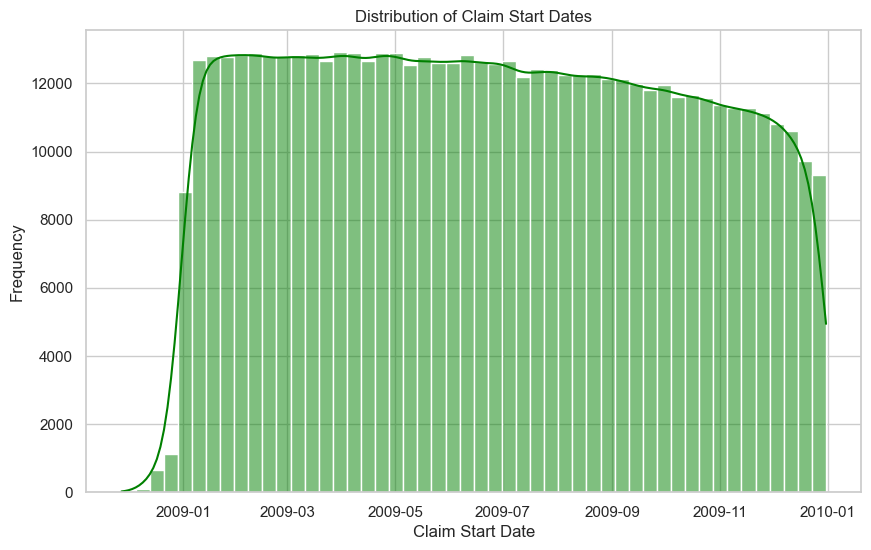

In [39]:
# Visualize Claim Start Dates Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_merged['ClaimStartDt'], bins=50, kde=True, color='green')
plt.title('Distribution of Claim Start Dates')
plt.xlabel('Claim Start Date')
plt.ylabel('Frequency')
plt.show()

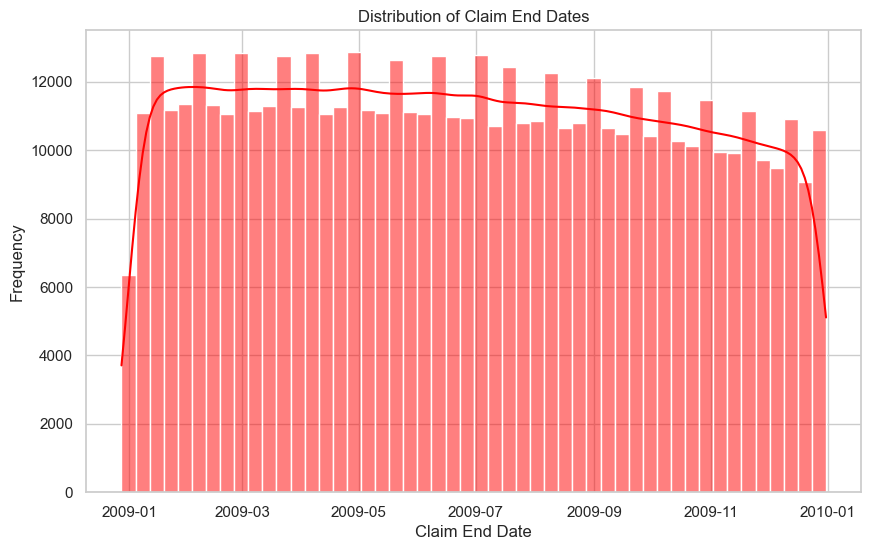

In [40]:
# Visualize Claim End Dates Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_merged['ClaimEndDt'], bins=50, kde=True, color='red')
plt.title('Distribution of Claim End Dates')
plt.xlabel('Claim End Date')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

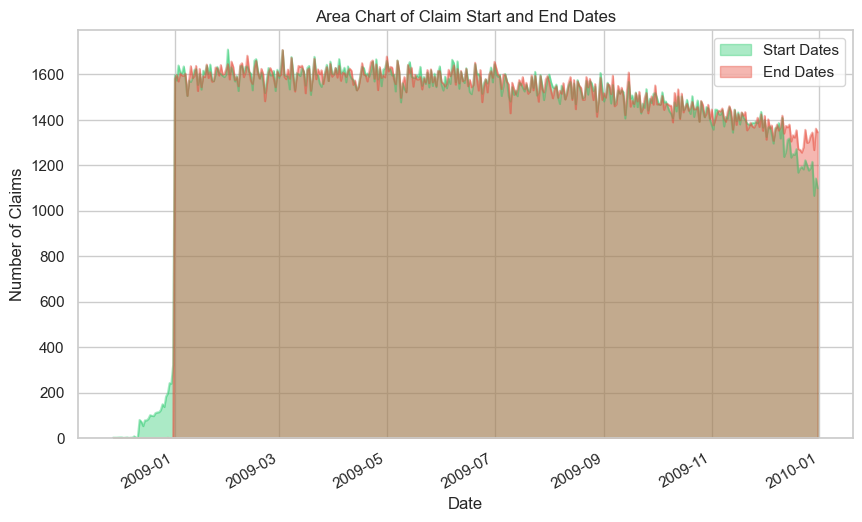

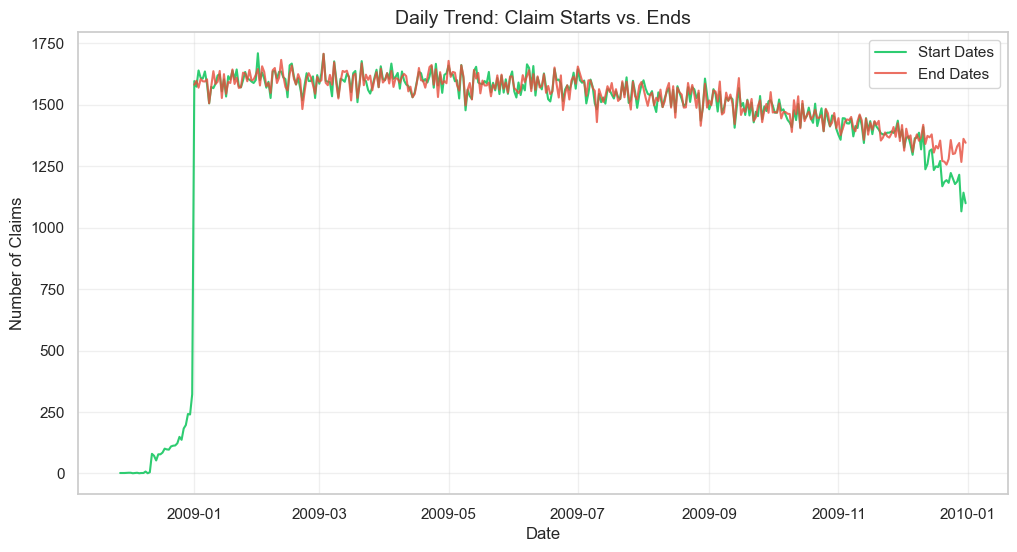

In [41]:
# Visualize Both Start and End Dates Together using Area Chart
plt.figure(figsize=(10, 6))
# Prepare data for area plot
start_dates = train_merged['ClaimStartDt'].value_counts().sort_index()
end_dates = train_merged['ClaimEndDt'].value_counts().sort_index()
# Create a DataFrame for plotting
date_df = pd.DataFrame({'Start Dates': start_dates, 'End Dates': end_dates})
# Plot area chart
date_df.plot.area(stacked=False,alpha=0.4, figsize=(10, 6), color=['#2ecc71', '#e74c3c'])
plt.title('Area Chart of Claim Start and End Dates')
plt.xlabel('Date')
plt.ylabel('Number of Claims')
plt.show()

# Visualize Both Start and End Dates Together using Line Chart
plt.figure(figsize=(12, 6))

# Using simple line plot
plt.plot(date_df.index, date_df['Start Dates'], label='Start Dates', color='#2ecc71', linewidth=1.5)
plt.plot(date_df.index, date_df['End Dates'], label='End Dates', color='#e74c3c', linewidth=1.5, alpha=0.8)

plt.title('Daily Trend: Claim Starts vs. Ends', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Claims')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### Feature Engineering: Claim Duration

In [42]:
# Calculate Claim Duration in Days
train_merged['ClaimDurationDays'] = (train_merged['ClaimEndDt'] - train_merged['ClaimStartDt']).dt.days
# Summary statistics of Claim Duration
print("Claim Duration (Days) Summary:")
print(train_merged['ClaimDurationDays'].describe())

Claim Duration (Days) Summary:
count    558211.000000
mean          1.728363
std           4.906205
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: ClaimDurationDays, dtype: float64


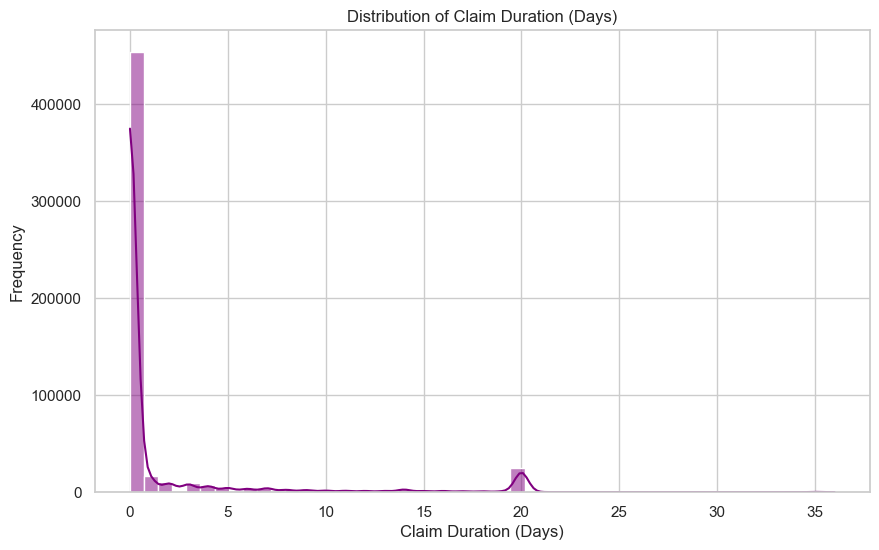

In [43]:
# Visualize Claim Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_merged['ClaimDurationDays'], bins=50, kde=True, color='purple')
plt.title('Distribution of Claim Duration (Days)')
plt.xlabel('Claim Duration (Days)')
plt.ylabel('Frequency')
plt.show()

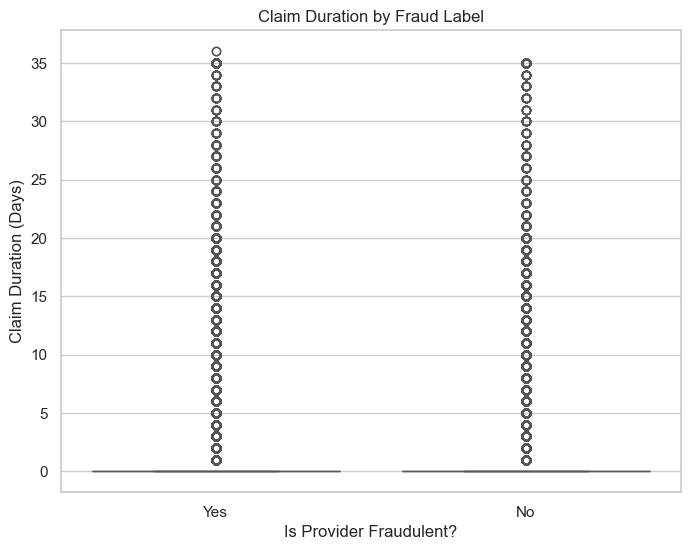

In [44]:
# Box Plot of Claim Duration by Fraud Label
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_merged, x='PotentialFraud', y='ClaimDurationDays', palette={'Yes': '#ff6b6b', 'No': '#4ecdc4'})
plt.title('Claim Duration by Fraud Label')
plt.xlabel('Is Provider Fraudulent?')
plt.ylabel('Claim Duration (Days)')
plt.show()

In [45]:
# Correlation between Original Dates and Fraud
date_correlation = train_merged[['ClaimStartDt', 'ClaimEndDt', 'PotentialFraud']].copy()
date_correlation['PotentialFraud'] = date_correlation['PotentialFraud'].map({'Yes': 1, 'No': 0})
date_correlation['ClaimStartDt'] = date_correlation['ClaimStartDt'].astype(np.int64) // 10**9  # Convert to seconds since epoch
date_correlation['ClaimEndDt'] = date_correlation['ClaimEndDt'].astype(np.int64) // 10**9  # Convert to seconds since epoch
correlation_matrix = date_correlation.corr()
print("Correlation Matrix between Claim Dates and Potential Fraud:")
print(correlation_matrix)

Correlation Matrix between Claim Dates and Potential Fraud:
                ClaimStartDt  ClaimEndDt  PotentialFraud
ClaimStartDt        1.000000    0.998892       -0.002507
ClaimEndDt          0.998892    1.000000       -0.001159
PotentialFraud     -0.002507   -0.001159        1.000000


In [46]:
# Correlation between Claim Duration and Fraud
fraud_correlation = train_merged[['ClaimDurationDays', 'PotentialFraud']].copy()
fraud_correlation['PotentialFraud'] = fraud_correlation['PotentialFraud'].map({'Yes': 1, 'No': 0})
correlation_value = fraud_correlation.corr().loc['ClaimDurationDays', 'PotentialFraud']
print(f"Correlation between Claim Duration and Potential Fraud: {correlation_value:.4f}")

Correlation between Claim Duration and Potential Fraud: 0.0287


In [47]:
# Drop original date columns after extracting duration as it has
# been proven that they have lower correlation with fraud than duration

# They will be dropped after we finish all date-related feature engineering
# as they are used in other features like DeathDuringClaim in DOD section
# train_merged.drop(columns=['ClaimStartDt', 'ClaimEndDt'], inplace=True, axis=1)

## DOB (Date of Birth)

In [48]:
train_merged['DOB'].value_counts(dropna=False).head()

DOB
1943-12-01    2072
1939-03-01    2030
1942-10-01    1989
1939-04-01    1984
1938-09-01    1971
Name: count, dtype: int64

#### Feature Engineering: Beneficiary Age

we will Calculate the exact age of each beneficiary to use as a demographic feature.

* **Reference Date:** We set the "current" date to **2010-01-01**. This roughly aligns with the dataset's timeline (2009 claims) and as if we are only 1 day after data delivered (earliest date in data is 31st of December 2009".
* **Formula:** Age = (2010-01-01 - Date of Birth (`DOB`) )/ **365.25**
(accounting for leap years) to get a precise float value , capturing the exact continuous age including months & days.

In [49]:
def calculate_age(df, ref_date_str='2010-01-01'):
    # Define Reference Date
    ref_date = pd.Timestamp(ref_date_str)

    # Ensure DOB is datetime
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

    # Calculate Age in Days then convert to Years (float)
    # We use 365.25 to account for leap years over a lifetime
    df['Age'] = (ref_date - df['DOB']).dt.days / 365.25

    return df

# Apply the function to calculate age
print("Calculating Patient Ages (Reference: 2010-01-01)")
train_merged = calculate_age(train_merged)

print(f"Train Age Range: {train_merged['Age'].min():.1f} to {train_merged['Age'].max():.3f} years")

Calculating Patient Ages (Reference: 2010-01-01)
Train Age Range: 26.1 to 100.999 years


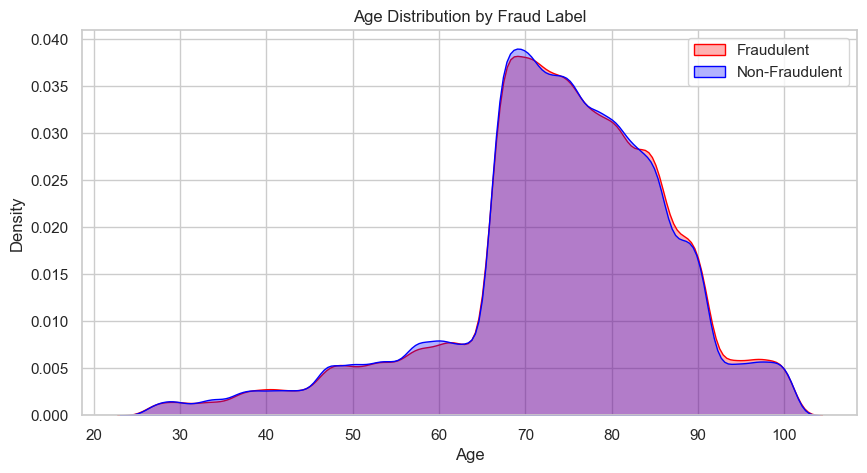

In [50]:
# Visualization: Age Distribution for Fraud vs Non-Fraud
plt.figure(figsize=(10, 5))
sns.kdeplot(data=train_merged[train_merged['PotentialFraud']=='Yes'], x='Age', label='Fraudulent', fill=True, color='red', alpha=0.3)
sns.kdeplot(data=train_merged[train_merged['PotentialFraud']=='No'], x='Age', label='Non-Fraudulent', fill=True, color='blue', alpha=0.3)
plt.title('Age Distribution by Fraud Label')
plt.legend()
plt.show()

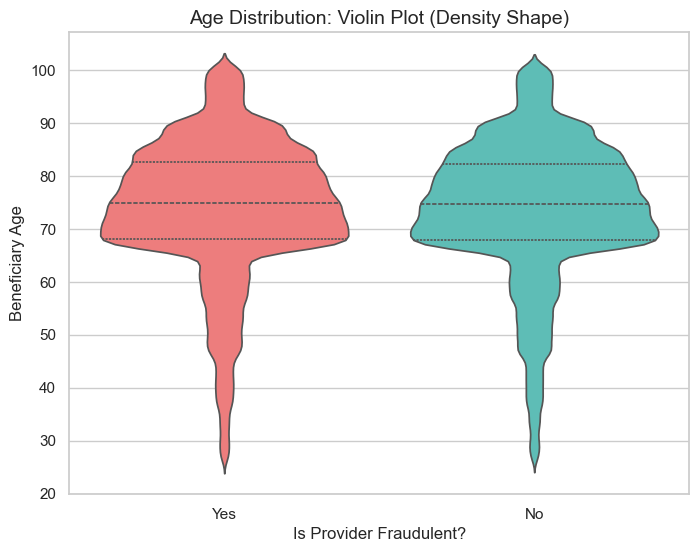

In [51]:
# Violin Plot (Density Shape)

plt.figure(figsize=(8, 6)) # Individual figure size

sns.violinplot(
    data=train_merged,
    x='PotentialFraud',
    y='Age',
    hue='PotentialFraud',
    palette={'Yes': '#ff6b6b', 'No': '#4ecdc4'}, # Custom clean colors
    inner='quartile' # Draws lines for 25%, 50%, 75%
)

plt.title('Age Distribution: Violin Plot (Density Shape)', fontsize=14)
plt.xlabel('Is Provider Fraudulent?')
plt.ylabel('Beneficiary Age')
plt.show()

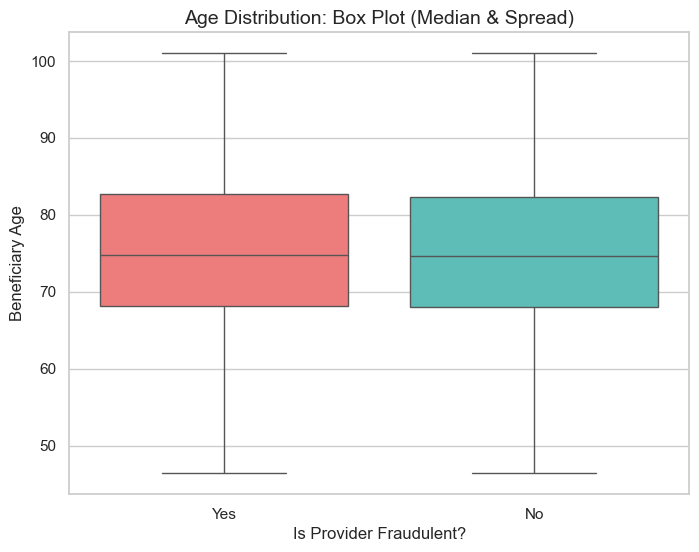

In [52]:
# Box Plot (Median & Spread)

plt.figure(figsize=(8, 6)) # Individual figure size

sns.boxplot(
    data=train_merged,
    x='PotentialFraud',
    y='Age',
    hue='PotentialFraud',
    palette={'Yes': '#ff6b6b', 'No': '#4ecdc4'},
    showfliers=False # Hides extreme outliers to keep the plot clean
)

plt.title('Age Distribution: Box Plot (Median & Spread)', fontsize=14)
plt.xlabel('Is Provider Fraudulent?')
plt.ylabel('Beneficiary Age')
plt.show()

In [53]:
# Drop original DOB column after extracting Age , as age is more useful for
# modeling and preserves the same exact info (sense it is a decimal value)
train_merged.drop(columns=['DOB'], inplace=True, axis=1)

## DOD (Date of Death)

In [54]:
train_merged['DOD'].value_counts(dropna=False)

DOD
NaN           554080
2009-12-01       710
2009-10-01       572
2009-11-01       560
2009-09-01       511
2009-08-01       482
2009-07-01       371
2009-06-01       295
2009-05-01       243
2009-04-01       166
2009-03-01       157
2009-02-01        64
Name: count, dtype: int64

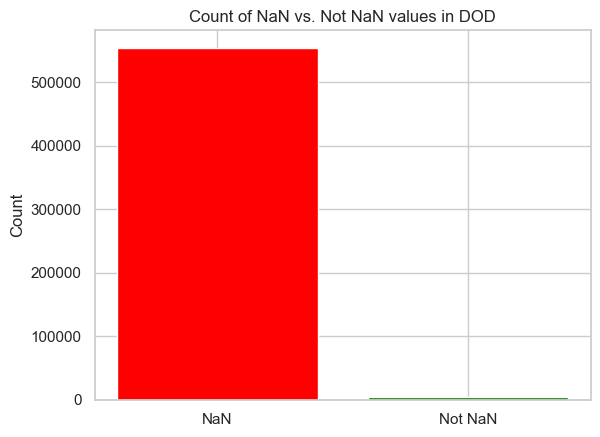

In [55]:
nan_count = train_merged['DOD'].isna().sum()
not_nan_count = train_merged['DOD'].notna().sum()

counts = {'NaN': nan_count, 'Not NaN': not_nan_count}
plt.bar(counts.keys(), counts.values(), color=['red', 'green'])
plt.title('Count of NaN vs. Not NaN values in DOD')
plt.ylabel('Count')
plt.show()

2025-11-25 04:01:00,485: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-25 04:01:00,650: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


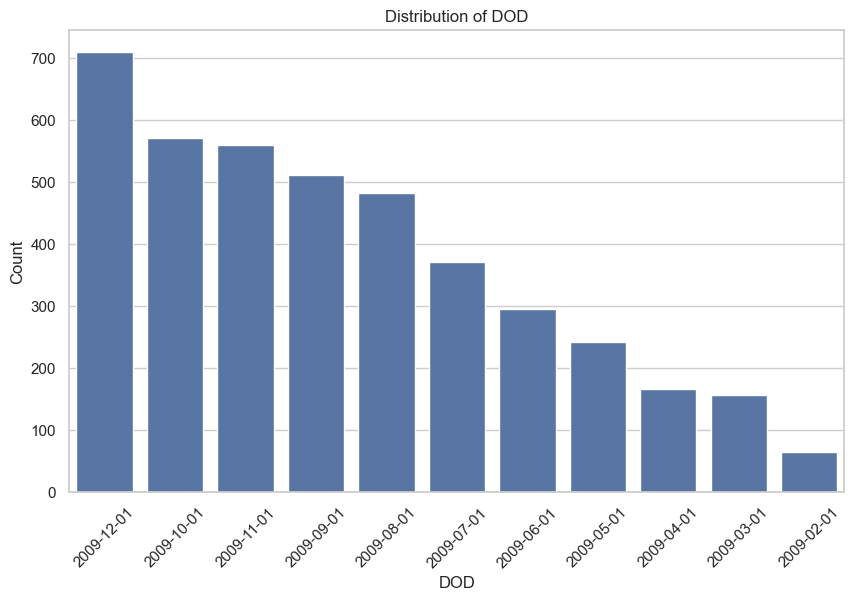

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_merged, x='DOD', order=train_merged['DOD'].value_counts().index)
plt.title('Distribution of DOD')
plt.xlabel('DOD')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [57]:
print("Count of Not NaN DOD values where PotentialFraud is Yes:")
print(train_merged['DOD'].notna()[train_merged['PotentialFraud'] == 'Yes'].sum())

print("Count of Not NaN DOD values where PotentialFraud is No:")
print(train_merged['DOD'].notna()[train_merged['PotentialFraud'] == 'No'].sum())

Count of Not NaN DOD values where PotentialFraud is Yes:
1544
Count of Not NaN DOD values where PotentialFraud is No:
2587


The Date of Death (DOD) column itself doesnt have meaning but from it we can derive a new feature called "Death During Claim" which indicates whether the patient died during the claim period.

where for DOD not null and DOD is between ClaimStartDt and ClaimEndDt we can say that the patient died during the claim period.

all other cases (nulls) we can say that the patient did not die during the claim period.

In [58]:
# Feature Engineering: Death During Claim

def create_death_flag(df):
    # Ensure datetime format
    df['DOD'] = pd.to_datetime(df['DOD'], errors='coerce')
    df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'], errors='coerce')
    df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'], errors='coerce')

    # Create the flag
    # Logic: DOD must exist AND be within the claim window
    df['DeathDuringClaim'] = np.where(
        (df['DOD'].notnull()) &
        (df['DOD'] >= df['ClaimStartDt']) &
        (df['DOD'] <= df['ClaimEndDt']),
        1,
        0
    )
    return df

train_merged = create_death_flag(train_merged)

# Verification
print("Death Flag Created.")
print(f"Train: {train_merged['DeathDuringClaim'].sum()} deaths during claim.")

# Quick relation to Fraud
if 'PotentialFraud' in train_merged.columns:
    print("\nFraud Rate for 'Death During Claim' cases:")
    print(train_merged[train_merged['DeathDuringClaim'] == 1]['PotentialFraud'].value_counts(normalize=True))

Death Flag Created.
Train: 21 deaths during claim.

Fraud Rate for 'Death During Claim' cases:
PotentialFraud
No     0.571429
Yes    0.428571
Name: proportion, dtype: float64


In [59]:
#not only it has a very small count , but it also there's
# no real significant relation between death during claim and potential fraud
#therfore we drop it
train_merged.drop(columns=['DeathDuringClaim'], inplace=True, axis=1)

#### Feature Engineering: IsDead Flag

In [60]:
# final idea , just keep a boolean flag indicating if DOD is present or not
# This is valuable: It tells us if the patient has a Date of Death recorded.
train_merged['IsDead'] = train_merged['DOD'].notnull().astype(int)
# drop the original DOD column
(train_merged.drop(columns=['DOD'], inplace=True, axis=1))
train_merged.shape

(558211, 55)

In [61]:
# Drop original date columns after extracting useful features as it has
# been proven that they have lower correlation with fraud than ClaimDurationDays

train_merged.drop(columns=['ClaimStartDt', 'ClaimEndDt'], inplace=True, axis=1)

In [62]:
train_merged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient,IsPostDischargeBilling,ClaimDurationDays,Age,IsDead
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,1,0,6,67.000684,0
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,1,0,2,67.000684,0
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,1,0,3,67.000684,0
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No,1,0,8,95.838467,0
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No,1,0,17,71.753593,0


## DeductibleAmtPaid

In [63]:
train_merged['DeductibleAmtPaid'].describe()

count    557312.000000
mean         78.421085
std         274.016812
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1068.000000
Name: DeductibleAmtPaid, dtype: float64

In [64]:
train_merged['DeductibleAmtPaid'].nunique(dropna=False)

18

In [65]:
train_merged['DeductibleAmtPaid'].value_counts(dropna=False)

DeductibleAmtPaid
0.0       496701
1068.0     39575
100.0       4582
70.0        2420
60.0        2065
40.0        2045
80.0        2024
50.0        1969
20.0        1406
30.0        1336
90.0        1245
10.0        1203
NaN          899
200.0        734
876.0          2
897.0          2
865.0          2
886.0          1
Name: count, dtype: int64

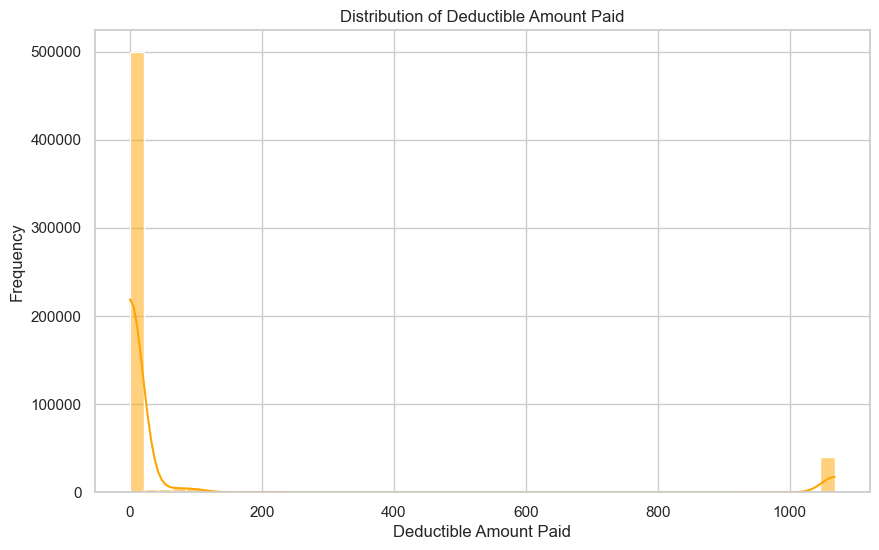

In [66]:
# Visualize Deductible Amount Paid Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_merged['DeductibleAmtPaid'], bins=50, kde=True , color='orange')
plt.xlabel('Deductible Amount Paid')
plt.ylabel('Frequency')
plt.title('Distribution of Deductible Amount Paid')
plt.show()

<Figure size 1200x600 with 0 Axes>

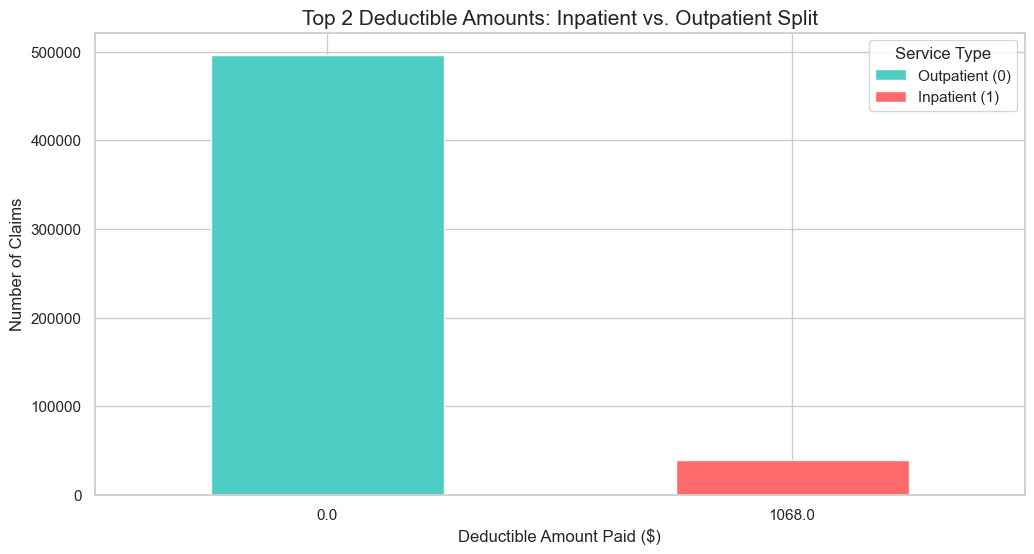

In [67]:
# --- Visualization: Top 2 Deductible Amounts by Patient Type ---

# 1. Identify the Top 2 most common Deductible Amounts
top_2_deductibles = train_merged['DeductibleAmtPaid'].value_counts().head(2).index

# 2. Filter the dataset to only these top 2 values
subset_df = train_merged[train_merged['DeductibleAmtPaid'].isin(top_2_deductibles)]

# 3. Prepare Data for Plotting (Count of claims per Deductible + Inpatient Status)
plot_data = subset_df.groupby(['DeductibleAmtPaid', 'IsInpatient']).size().unstack(fill_value=0)

# 4. Create the Stacked Bar Chart
plt.figure(figsize=(12, 6))
plot_data.plot(kind='bar', stacked=True, color=['#4ecdc4', '#ff6b6b'], figsize=(12, 6))

plt.title('Top 2 Deductible Amounts: Inpatient vs. Outpatient Split', fontsize=15)
plt.xlabel('Deductible Amount Paid ($)', fontsize=12)
plt.ylabel('Number of Claims', fontsize=12)
plt.legend(['Outpatient (0)', 'Inpatient (1)'], title='Service Type')
plt.xticks(rotation=0)
plt.show()

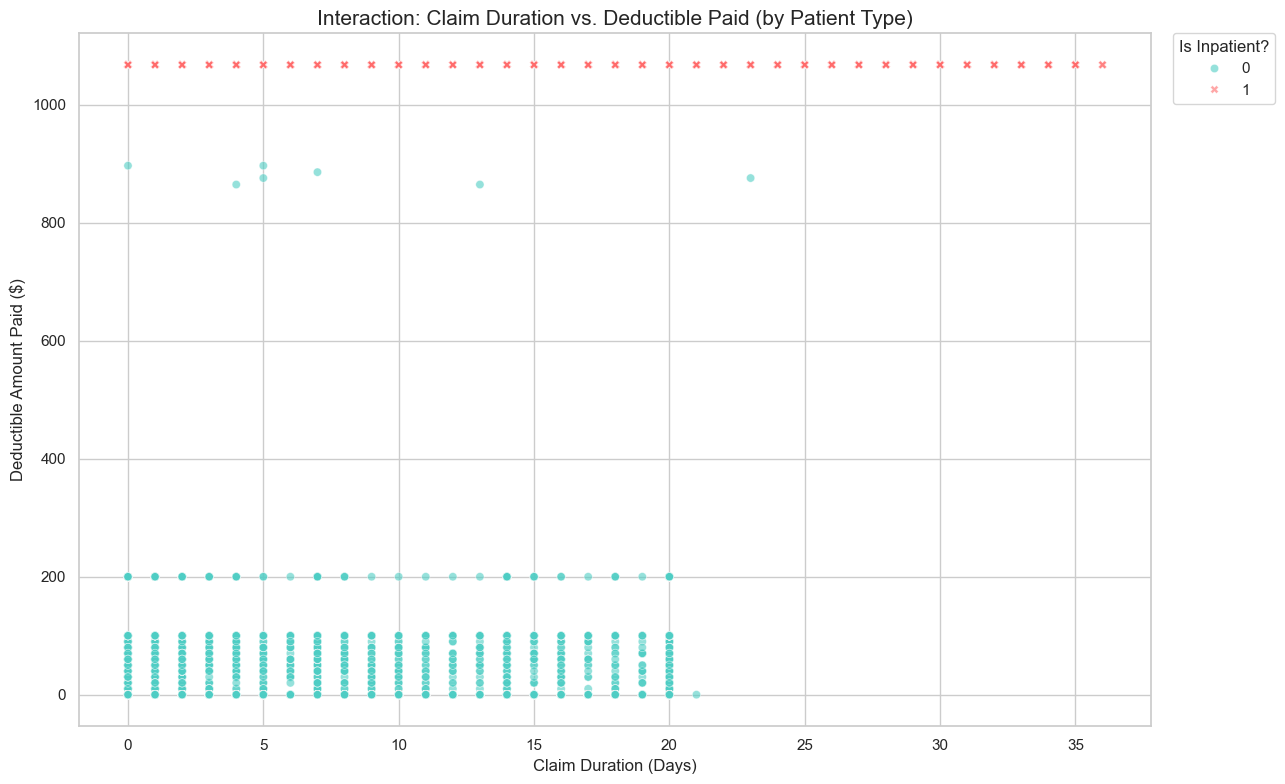

In [68]:
# Visualization: 3-Variable Interaction
# (Claim Duration, Deductible Paid, Patient Type)

plt.figure(figsize=(13, 8))

sns.scatterplot(
    data=train_merged,
    x='ClaimDurationDays',
    y='DeductibleAmtPaid',
    hue='IsInpatient',
    style='IsInpatient',   # Adds shape difference for extra clarity
    palette={0: '#4ecdc4', 1: '#ff6b6b'}, # Teal for Outpatient, Red for Inpatient
    alpha=0.6              # Transparency to see overlapping points
)

plt.title('Interaction: Claim Duration vs. Deductible Paid (by Patient Type)', fontsize=15)
plt.xlabel('Claim Duration (Days)', fontsize=12)
plt.ylabel('Deductible Amount Paid ($)', fontsize=12)
plt.legend(title='Is Inpatient?', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

### Data Cleaning: Conditional Imputation for DeductibleAmtPaid

Based on the patterns observed, we will impute missing DeductibleAmtPaid values using the IsInpatient flag to assign standard deductible amounts

In [69]:
# (Domain Knowledge)
# Inpatient (1)  -> Standard Deductible is $1068
# Outpatient (0) -> Standard Deductible is $0
impute_map = {1: 1068,0: 0 }

# We create a Series of "Correct Values" based on IsInpatient, then use it to fill NaNs
train_merged['DeductibleAmtPaid'] = train_merged['DeductibleAmtPaid'].fillna(
    train_merged['IsInpatient'].map(impute_map)
)

print(f"Missing Deductibles in Train: {train_merged['DeductibleAmtPaid'].isnull().sum()}")

train_merged['DeductibleAmtPaid'].value_counts(dropna=False)

Missing Deductibles in Train: 0


DeductibleAmtPaid
0.0       496701
1068.0     40474
100.0       4582
70.0        2420
60.0        2065
40.0        2045
80.0        2024
50.0        1969
20.0        1406
30.0        1336
90.0        1245
10.0        1203
200.0        734
876.0          2
897.0          2
865.0          2
886.0          1
Name: count, dtype: int64

In [70]:
train_merged['DeductibleAmtPaid'] = train_merged['DeductibleAmtPaid'].astype('int64')

## Diagnosis and Procedure Code

Since the values used for the 16 columns ```ClmAdmitDiagnosisCode``` , ```ClmDiagnosisCode```(1-10) and ```ClmProcedureCode```(1-5) are Numerical codes and our earliest date value in all columns is 31st of December 2009 and according to project description the data source is the  U.S. Centers for Medicare & Medicaid Services (CMS), I did my research and found out that the data was encoded by International Classification of Diseases (ICD) following ICD-9-CM Diagnosis and Procedure Code system version 28 (2010 October version).

which can be found at :

https://www.cms.gov/medicare/coding-billing/icd-10-codes/icd-9-cm-diagnosis-procedure-codes-abbreviated-and-full-code-titles

and downloaded from the following link as a zip file contains 6 txt & xls files :
 https://www.cms.gov/medicare/coding/icd9providerdiagnosticcodes/downloads/cmsv28_master_descriptions.zip

The DX files contain the codes for Diseases and Conditions (used in ClmDiagnosisCode_1 to ClmDiagnosisCode_10):
- 'CMS28_DESC_LONG_SHORT_DX.xls' : both long & short descriptions for diseases codes
- 'CMS28_DESC_LONG_DX.txt' : long descriptions only for diseases codes
- 'CMS28_DESC_SHORT_DX.txt' : short descriptions only for diseases codes

The SG files contain the codes for Surgical/Procedure (used in ClmProcedureCode_1 to ClmProcedureCode_5):
- 'CMS28_DESC_LONG_SHORT_SG.xls' : both long & short descriptions for procedure codes
- 'CMS28_DESC_LONG_SG.txt' : long descriptions only for procedure codes
- 'CMS28_DESC_SHORT_SG.txt' : short descriptions only for procedure codes

for our context , we will use the **short description** files

in the docs folder i added the documents which we refer to in all the project , In the next cell i explain what we did fully to handle those 16 columns and group every single value in them into 17 different groups , I will add the code we used for that cell below

In [71]:
# --- Global Lookups for CMS Files ---
cms_dx_lookup = {}
cms_sg_lookup = {}


def load_cms_files():
    """Loads CMS description files into global dictionaries."""
    global cms_dx_lookup, cms_sg_lookup

    # Paths to the CMS files (Adjust these paths if your folder structure is different)
    dx_path = '../docs/CMSv28_Descriptions/CMS28_DESC_LONG_DX.txt'
    sg_path = '../docs/CMSv28_Descriptions/CMS28_DESC_LONG_SG.txt'

    def load_file(path):
        lookup = {}
        if os.path.exists(path):
            with open(path, 'r', encoding='utf-8', errors='ignore') as f:
                for line in f:
                    # CMS Format is typically: CODE   DESCRIPTION
                    parts = line.strip().split(maxsplit=1)
                    if len(parts) == 2:
                        code, desc = parts
                        lookup[code] = desc
        else:
            print(f"Warning: CMS file not found at {path}")
        return lookup

    print("Loading CMS Diagnosis definitions...")
    cms_dx_lookup = load_file(dx_path)

    print("Loading CMS Procedure definitions...")
    cms_sg_lookup = load_file(sg_path)


def lookup_with_format(code_str, is_diagnosis):
    """Helper to look up code in icd9cms library with different formats."""
    # Try exact match first
    desc = icd9.search(code_str)
    if desc:
        return desc.short_desc if desc.short_desc else desc.long_desc

    # Try adding decimal based on type
    if is_diagnosis:
        if len(code_str) > 3:
            code_with_dot = code_str[:3] + '.' + code_str[3:]
            desc = icd9.search(code_with_dot)
            if desc:
                return desc.short_desc if desc.short_desc else desc.long_desc
    else:
        if len(code_str) > 2:
            code_with_dot = code_str[:2] + '.' + code_str[2:]
            desc = icd9.search(code_with_dot)
            if desc:
                return desc.short_desc if desc.short_desc else desc.long_desc
    return None


def get_description(code, is_diagnosis=True):
    """Retrieves description for a code using CMS files, Manual list, or Library."""
    if pd.isna(code) or code == '':
        return "Unknown/Missing"

    code_str = str(code).strip()
    if code_str.endswith('.0'):
        code_str = code_str[:-2]

    # Manual overrides
    MANUAL_CODES = {
        '9904': 'Transfusion of packed cells',
        '8154': 'Total knee replacement',
        '66': 'Operations on fallopian tubes',
        '660': 'Salpingotomy and salpingostomy',
        '3893': 'Venous catheterization, NEC',
        '3995': 'Hemodialysis',
        '4516': 'EGD with closed biopsy',
        '4513': 'Other endoscopy of small intestine',
        '5123': 'Laparoscopic cholecystectomy',
        '8152': 'Partial hip replacement',
        '9339': 'Other physical therapy',
        '8108': 'Lumbar/lumbosacral fusion, post',
        '4523': 'Colonoscopy',
        '4525': 'Closed biopsy of large intestine',
        '5491': 'Percutaneous abdominal drainage',
        '4311': 'Percutaneous gastrostomy',
        '3324': 'Closed biopsy of bronchus',
        '8102': 'Other cervical fusion, ant',
        '3895': 'Venous cath for renal dialysis',
        '4573': 'Open/other right hemicolectomy',
        '8659': 'Closure of skin/subcut tissue NEC',
        '4019': 'Hypertension NOS',
        '2724': 'Hyperlipidemia NEC/NOS',
        '25000': 'DMII wo cmp nt st uncntr',
        '42731': 'Atrial fibrillation',
        '53081': 'Esophageal reflux',
        '2449': 'Hypothyroidism NOS',
        '2720': 'Pure hypercholesterolemia',
        '4011': 'Benign hypertension',
        '2859': 'Anemia NOS',
        '25001': 'DMI wo cmp nt st uncntr',
        '0431': 'Intracerebral hemorrhage',
        '51': 'Operations on gallbladder and biliary tract',
        '0430': 'Subarachnoid hemorrhage',
        '80': 'Incision and excision of joint structures',
        '70': 'Operations on vagina and cul-de-sac',
        '61': 'Operations on scrotum and tunica vaginalis',
        '17': 'Other miscellaneous diagnostic and therapeutic procedures',
        '81': 'Repair and plastic operations on joint structures',
        '64': 'Operations on penis',
        '82': 'Operations on muscle, tendon, and fascia of hand',
        '84': 'Other procedures on musculoskeletal system',
        '113': 'Excision of pterygium',
        '22': 'Operations on nasal sinuses',
        '50': 'Operations on liver',
        '71': 'Operations on vulva and perineum',
        '62': 'Operations on testes',
        '73': 'Other procedures inducing or assisting delivery',
        '72': 'Forceps, vacuum, and breech delivery',
        '42': 'Operations on esophagus',
        '13': 'Operations on lens',
        '14': 'Operations on retina, choroid, vitreous, and posterior chamber',
        '54': 'Other operations on abdominal region',
        '90': 'Microscopic examination - I',
        '34': 'Operations on chest wall, pleura, mediastinum, and diaphragm',
        '36': 'Operations on vessels of heart',
        '83': 'Operations on muscle, tendon, fascia, and bursa, except hand',
        '40': 'Operations on lymphatic system',
        '59': 'Other operations on urinary system',
        '609': 'Other operations on prostate',
        '15': 'Operations on extraocular muscles',
        '11': 'Operations on cornea',
        '407': 'Other excision or avulsion of cranial and peripheral nerves',
        '889': 'Other diagnostic imaging',
        '52': 'Operations on pancreas',
        '16': 'Operations on orbit and eyeball',
        '419': 'Other operations on spleen and bone marrow',
        '43': 'Incision and excision of stomach',
        '53': 'Repair of hernia'
    }

    if code_str in MANUAL_CODES:
        return MANUAL_CODES[code_str]

    if is_diagnosis:
        if code_str in cms_dx_lookup: return cms_dx_lookup[code_str]
    else:
        if code_str in cms_sg_lookup: return cms_sg_lookup[code_str]

    if code_str in cms_dx_lookup: return cms_dx_lookup[code_str]
    if code_str in cms_sg_lookup: return cms_sg_lookup[code_str]

    desc = lookup_with_format(code_str, is_diagnosis)
    if desc: return desc

    desc = lookup_with_format(code_str, not is_diagnosis)
    if desc: return desc

    return "Description not found"


# --- Grouping Functions ---

def get_diagnosis_group(code):
    code = str(code).strip().upper()

    if code.startswith('V'): return 'Supplementary Factors (V-Codes)'
    if code.startswith('E'): return 'External Causes of Injury (E-Codes)'

    try:
        prefix_str = code[:3]
        if not prefix_str: return 'Other/Unknown Diagnosis'
        prefix = int(prefix_str)

        if 1 <= prefix <= 139: return 'Infectious And Parasitic Diseases'
        if 140 <= prefix <= 239: return 'Neoplasms'
        if 240 <= prefix <= 279: return 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'
        if 280 <= prefix <= 289: return 'Diseases Of The Blood And Blood-Forming Organs'
        if 290 <= prefix <= 319: return 'Mental Disorders'
        if 320 <= prefix <= 389: return 'Diseases Of The Nervous System And Sense Organs'
        if 390 <= prefix <= 459: return 'Diseases Of The Circulatory System'
        if 460 <= prefix <= 519: return 'Diseases Of The Respiratory System'
        if 520 <= prefix <= 579: return 'Diseases Of The Digestive System'
        if 580 <= prefix <= 629: return 'Diseases Of The Genitourinary System'
        if 630 <= prefix <= 679: return 'Complications Of Pregnancy, Childbirth, And The Puerperium'
        if 680 <= prefix <= 709: return 'Diseases Of The Skin And Subcutaneous Tissue'
        if 710 <= prefix <= 739: return 'Diseases Of The Musculoskeletal System And Connective Tissue'
        if 740 <= prefix <= 759: return 'Congenital Anomalies'
        if 760 <= prefix <= 779: return 'Certain Conditions Originating In The Perinatal Period'
        if 780 <= prefix <= 799: return 'Symptoms, Signs, And Ill-Defined Conditions'
        if 800 <= prefix <= 999: return 'Injury And Poisoning'

        return 'Other/Unknown Diagnosis'
    except:
        return 'Other/Unknown Diagnosis'


def get_procedure_group(code):
    code = str(code).strip()

    try:
        if not code: return 'Other/Unknown Procedure'
        if len(code) == 1:
            prefix = int(code)
        else:
            prefix = int(code[:2])

        if prefix == 0: return 'Procedures and interventions, Not Elsewhere Classified'
        if 1 <= prefix <= 5: return 'Operations on the nervous system'
        if 6 <= prefix <= 7: return 'Operations on the endocrine system'
        if 8 <= prefix <= 16: return 'Operations on the eye'
        if prefix == 17: return 'Other miscellaneous diagnostic and therapeutic procedures'
        if 18 <= prefix <= 20: return 'Operations on the ear'
        if 21 <= prefix <= 29: return 'Operations on the nose, mouth, and pharynx'
        if 30 <= prefix <= 34: return 'Operations on the respiratory system'
        if 35 <= prefix <= 39: return 'Operations on the cardiovascular system'
        if 40 <= prefix <= 41: return 'Operations on the hemic and lymphatic system'
        if 42 <= prefix <= 54: return 'Operations on the digestive system'
        if 55 <= prefix <= 59: return 'Operations on the urinary system'
        if 60 <= prefix <= 64: return 'Operations on the male genital organs'
        if 65 <= prefix <= 71: return 'Operations on the female genital organs'
        if 72 <= prefix <= 75: return 'Obstetrical procedures'
        if 76 <= prefix <= 84: return 'Operations on the musculoskeletal system'
        if 85 <= prefix <= 86: return 'Operations on the integumentary system'
        if 87 <= prefix <= 99: return 'Miscellaneous diagnostic and therapeutic procedures'

        return 'Other/Unknown Procedure'
    except:
        return 'Other/Unknown Procedure'


def get_larger_group(group_name):
    """Maps the detailed Group to a Larger Optimized Group."""
    group_name = str(group_name)

    # 1. Consolidate all Procedures/Operations
    if ('Operation' in group_name or 'Procedure' in group_name
            or 'Miscellaneous' in group_name or 'procedures' in group_name):
        return 'Procedures & Surgeries'

    # 2. Consolidate Trauma (Injury + External Causes)
    if 'Injury' in group_name or 'External Causes' in group_name:
        return 'Injury, Poisoning & External Causes'

    # 3. Consolidate Obstetrics (Pregnancy + Perinatal)
    if 'Pregnancy' in group_name or 'Perinatal' in group_name:
        return 'Pregnancy, Childbirth & Perinatal'

    # 4. Consolidate Systemic issues (Endocrine + Blood)
    if 'Blood' in group_name or 'Endocrine' in group_name or 'Immunity' in group_name:
        return 'Systemic, Metabolic & Blood Disorders'

    # 5. Shorten/Clean names for others
    if 'Nervous' in group_name: return 'Diseases Of The Nervous System'
    if 'Musculoskeletal' in group_name: return 'Musculoskeletal & Connective Tissue'
    if 'Skin' in group_name: return 'Diseases Of The Skin'
    if 'Symptoms' in group_name: return 'Symptoms, Signs, And Ill-Defined'

    # Return original if no change needed (Circulatory, Respiratory, etc.)
    return group_name


# --- Main Processing ---

def process_files():
    load_cms_files()

    inpatient_path = '../data/Train_Inpatientdata.csv'
    outpatient_path = '../data/Train_Outpatientdata.csv'
    test_inpatient_path = '../data/Test_Inpatientdata.csv'
    test_outpatient_path = '../data/Test_Outpatientdata.csv'

    print("Loading Data...")

    all_dfs = []
    for path in [inpatient_path, outpatient_path, test_inpatient_path, test_outpatient_path]:
        try:
            if os.path.exists(path):
                print(f"Reading {path}...")
                all_dfs.append(pd.read_csv(path))
            else:
                print(f"Skipping {path} (not found)")
        except Exception as e:
            print(f"Error reading {path}: {e}")

    if not all_dfs:
        print("No data loaded. Exiting.")
        return

    df = pd.concat(all_dfs, ignore_index=True)

    diag_cols = ['ClmAdmitDiagnosisCode'] + [f'ClmDiagnosisCode_{i}' for i in range(1, 11)]
    proc_cols = [f'ClmProcedureCode_{i}' for i in range(1, 7)]

    all_codes = {}

    # Helper to process columns
    def process_cols(cols, is_diag):
        for col in cols:
            if col not in df.columns: continue
            vc = df[col].value_counts().to_dict()
            for code, count in vc.items():
                code_str = str(code).strip()
                if code_str.endswith('.0'): code_str = code_str[:-2]

                if code_str not in all_codes:
                    desc = get_description(code_str, is_diagnosis=is_diag)
                    group = get_diagnosis_group(code_str) if is_diag else get_procedure_group(code_str)
                    larger_group = get_larger_group(group)

                    all_codes[code_str] = {
                        'code': code_str,
                        'type': 'Diagnosis' if is_diag else 'Procedure',
                        'count': count,
                        'description': desc,
                        'Group': group,
                        'Larger group': larger_group
                    }
                else:
                    all_codes[code_str]['count'] += count

    print("Processing Codes...")
    process_cols(diag_cols, is_diag=True)
    process_cols(proc_cols, is_diag=False)

    # Convert to DataFrame
    results_df = pd.DataFrame(all_codes.values())

    # Sort by count descending
    results_df = results_df.sort_values('count', ascending=False)

    # Save to CSV
    output_path = '../docs/code_definitions_grouped.csv'
    results_df.to_csv(output_path, index=False)
    print(f"Saved all grouped code definitions to {output_path}")
    print("\nAll Larger Groups:")
    print(results_df['Larger group'].value_counts())
    print("\nTotal Frequency Count by Larger Group (Total Occurrences):")
    total_counts = results_df.groupby('Larger group')['count'].sum().sort_values(ascending=False)
    print(total_counts)

if __name__ == "__main__":
    process_files()

Loading CMS Diagnosis definitions...
Loading CMS Procedure definitions...
Loading Data...
Reading ../data/Train_Inpatientdata.csv...
Reading ../data/Train_Outpatientdata.csv...
Reading ../data/Test_Inpatientdata.csv...
Reading ../data/Test_Outpatientdata.csv...
Processing Codes...
Saved all grouped code definitions to ../docs/code_definitions_grouped.csv

All Larger Groups:
Larger group
Injury, Poisoning & External Causes      2573
Diseases Of The Nervous System           1361
Supplementary Factors (V-Codes)           966
Neoplasms                                 927
Musculoskeletal & Connective Tissue       886
Procedures & Surgeries                    817
Infectious And Parasitic Diseases         777
Diseases Of The Digestive System          582
Mental Disorders                          468
Diseases Of The Circulatory System        453
Systemic, Metabolic & Blood Disorders     436
Diseases Of The Genitourinary System      379
Congenital Anomalies                      356
Symptoms, Si

In [72]:
# Define the columns you want to pool together
proc_cols = [ 'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'
]

# Stack them into one single Series and count
# stack() automatically drops NaN values, which is exactly what you want here.
distinct_counts = train_merged[proc_cols].stack().value_counts().head(10)

# View the top 10 most common codes across all 10 columns
print(distinct_counts)

4019     77056
25000    37356
2724     35763
V5869    24904
4011     23773
42731    20138
V5861    20001
2720     18268
2449     17600
4280     15507
Name: count, dtype: int64


In [73]:
# Define the columns you want to pool together
proc_cols = [
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
    'ClmProcedureCode_4', 'ClmProcedureCode_5'
]

# Stack them into one single Series and count
# stack() automatically drops NaN values, which is exactly what you want here.
distinct_counts = train_merged[proc_cols].stack().value_counts().head(10)

# View the top 10 most common codes across all 5 columns
print(distinct_counts)

4019.0    1959
9904.0    1152
2724.0    1054
8154.0    1022
66.0       901
3893.0     854
3995.0     809
4516.0     651
3722.0     589
8151.0     463
Name: count, dtype: int64


### Feature Engineering & Dimensionality Reduction

In this step, we performed advanced **Feature Engineering** to transform raw medical codes into meaningful numerical features for our model.

#### 1. Feature Construction (Usage Intensity)
We created two new features, `ClmDiagnosisCount` and `ClmProceduresCount`, which calculate the **non-null count** of diagnoses and procedures per claim.
* **Why?** This acts as a proxy for **patient complexity**. A patient with 10 diagnoses is likely sicker and higher-risk than a patient with only 1.

#### 2. Dimensionality Reduction (Grouping)
The raw dataset contained thousands of unique ICD-9 codes. Using them directly would create a sparse dataset with too much noise ("Curse of Dimensionality").
* **What we did:** We mapped thousands of granular codes into **17 high-level clinical "Super Groups"** (e.g., *Circulatory*, *Trauma*, *Procedures*).
* **Why?** This reduces noise and helps the model find patterns (e.g., "Patients with *any* heart issue are higher risk") rather than getting lost in specific, rare codes.

#### 3. Frequency Encoding (Bag-of-Words Approach)
For the 17 new group columns (e.g., `Count_Circulatory`), we counted how many times a code from that group appeared across all 16 diagnosis/procedure columns for that patient.
* **Why?** Unlike standard One-Hot Encoding (0 or 1), this captures **severity**. A patient with 3 separate heart diagnoses is different from a patient with just 1.

#### 4. Feature Abstraction
We replaced the specific `ClmAdmitDiagnosisCode` (e.g., `401.9`) with its broader category (e.g., `Diseases Of The Circulatory System`).
* **Why?** This allows the model to treat similar admission reasons (like different types of heart attacks) as a single meaningful category.

In [74]:
df_defs = pd.read_csv('../docs/code_definitions_grouped.csv')

code_to_group = dict(zip(df_defs['code'].astype(str), df_defs['Larger group']))

diag_cols_1_10 = [f'ClmDiagnosisCode_{i}' for i in range(1, 11)]
proc_cols_1_5 = [f'ClmProcedureCode_{i}' for i in range(1, 6)]

# The 16 columns you specified for group counting
all_code_cols = ['ClmAdmitDiagnosisCode'] + diag_cols_1_10 + proc_cols_1_5

In [75]:
# Count non-null values for diagnoses (1-10) and procedures (1-5)
train_merged['ClmDiagnosisCount'] = train_merged[diag_cols_1_10].notnull().sum(axis=1)
train_merged['ClmProceduresCount'] = train_merged[proc_cols_1_5].notnull().sum(axis=1)

In [76]:
train_merged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient,IsPostDischargeBilling,ClaimDurationDays,Age,IsDead,ClmDiagnosisCount,ClmProceduresCount
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,NaN,7866,1068,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,1,0,6,67.000684,0,9,0
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,1,0,2,67.000684,0,3,1
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,1,0,3,67.000684,0,6,0
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No,1,0,8,95.838467,0,9,1
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No,1,0,17,71.753593,0,9,1


In [77]:
# 4. Feature Engineering: Grouped Counts (The 17 Columns)
print("Processing Group Counts...")

# Step A: Create a temporary "long" version of the data to map and count efficiently
# We work with a subset to save memory, using the index to map back to the original df
temp_df = train_merged[all_code_cols].copy()
temp_df['TEMP_INDEX'] = temp_df.index

# Melt: Turns the 16 columns into 2 columns: [Index, Code]
melted = temp_df.melt(id_vars='TEMP_INDEX', value_vars=all_code_cols, value_name='Code').dropna(subset=['Code'])

# Clean codes (ensure string, remove decimals if any exist to match your dictionary)
melted['Code'] = melted['Code'].astype(str).str.replace('.', '', regex=False)

# Step B: Map the Codes to "Larger group"
melted['Group'] = melted['Code'].map(code_to_group)

# Fill unmapped codes with 'Unknown' (Optional, helps verify data quality)
melted['Group'] = melted['Group'].fillna('UnknownCodesCount')

# Step C: Count occurrences of each Group per row (Pivot Table)
# This creates columns for each group with the count of times it appeared in that row
group_counts = pd.crosstab(melted['TEMP_INDEX'], melted['Group'])

# Step D: Join this back to the main dataframe
# We align on the index.
train_merged = train_merged.join(group_counts)

new_group_cols = group_counts.columns
train_merged[new_group_cols] = train_merged[new_group_cols].fillna(0)

# Ensure we only keep the 17 specific groups you asked for (plus Unknown if you want it)
expected_groups = [
    'Injury, Poisoning & External Causes',
    'Diseases Of The Nervous System',
    'Supplementary Factors (V-Codes)',
    'Neoplasms',
    'Musculoskeletal & Connective Tissue',
    'Procedures & Surgeries',
    'Infectious And Parasitic Diseases',
    'Diseases Of The Digestive System',
    'Mental Disorders',
    'Diseases Of The Circulatory System',
    'Systemic, Metabolic & Blood Disorders',
    'Diseases Of The Genitourinary System',
    'Congenital Anomalies',
    'Symptoms, Signs, And Ill-Defined',
    'Pregnancy, Childbirth & Perinatal',
    'Diseases Of The Respiratory System',
    'Diseases Of The Skin'
]

# Double check that columns are int type (crosstab/join might create floats)
for col in expected_groups:
    if col in train_merged.columns:
        train_merged[col] = train_merged[col].astype(int)
    else:
        # If a group didn't appear in this specific dataset, create it as 0
        train_merged[col] = 0

Processing Group Counts...


In [78]:
print(train_merged[['ClmDiagnosisCount', 'ClmProceduresCount'] + expected_groups[:3]].head())

   ClmDiagnosisCount  ClmProceduresCount  Injury, Poisoning & External Causes  \
0                  9                   0                                    0   
1                  3                   1                                    0   
2                  6                   0                                    0   
3                  9                   1                                    0   
4                  9                   1                                    0   

   Diseases Of The Nervous System  Supplementary Factors (V-Codes)  
0                               0                                0  
1                               0                                0  
2                               2                                1  
3                               2                                1  
4                               1                                0  


In [79]:
train_merged['ClmAdmitDiagnosisCode'].value_counts(dropna=False).head()

ClmAdmitDiagnosisCode
NaN      412312
V7612      4074
42731      3634
78605      2992
4019       2732
Name: count, dtype: int64

In [80]:
# Update ClmAdmitDiagnosisCode
# Map the code to the group name, filling NaN with 'Unknown'
print("Updating Admit Diagnosis...")
train_merged['ClmAdmitDiagnosisCode'] = train_merged['ClmAdmitDiagnosisCode'].astype(str).str.replace('.', '', regex=False)
train_merged['ClmAdmitDiagnosisCode'] = train_merged['ClmAdmitDiagnosisCode'].map(code_to_group).fillna('Unknown')

# Display results
print(train_merged['ClmAdmitDiagnosisCode'].value_counts(dropna=False).head())

Updating Admit Diagnosis...
ClmAdmitDiagnosisCode
Unknown                                412312
Symptoms, Signs, And Ill-Defined        31973
Supplementary Factors (V-Codes)         19982
Diseases Of The Circulatory System      19579
Musculoskeletal & Connective Tissue     15955
Name: count, dtype: int64


In [81]:
train_merged['UnknownCodesCount'] = train_merged['UnknownCodesCount'].astype('int64')

In [82]:
# Drop the used 15 column , they now have no meaning after extracting their features
cols_to_drop = diag_cols_1_10 + proc_cols_1_5
train_merged.drop(columns=cols_to_drop, inplace=True, axis=1)
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   BeneID                                 558211 non-null  object 
 1   ClaimID                                558211 non-null  object 
 2   Provider                               558211 non-null  object 
 3   InscClaimAmtReimbursed                 558211 non-null  int64  
 4   AttendingPhysician                     556703 non-null  object 
 5   OperatingPhysician                     114447 non-null  object 
 6   OtherPhysician                         199736 non-null  object 
 7   ClmAdmitDiagnosisCode                  558211 non-null  object 
 8   DeductibleAmtPaid                      558211 non-null  int64  
 9   DiagnosisGroupCode                     558211 non-null  object 
 10  Gender                                 558211 non-null  

## Gender

In [83]:
train_merged['Gender'].value_counts(dropna=False)

Gender
2    323114
1    235097
Name: count, dtype: int64

### Data Transformation : Codes to Letter

after doing my research , I found that according to CMS Linkable 2008–2010 Medicare Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF) :

https://www.cms.gov/files/document/de-10-codebook.pdf-0

In page 17 it was mentioned that :

- Label Male was Coded to '1'
- Label Female was Coded to '2'

In [84]:
train_merged['Gender'] = train_merged['Gender'].replace(2,0)

In [85]:
train_merged['Gender'].value_counts(dropna=False)

Gender
0    323114
1    235097
Name: count, dtype: int64

In [86]:
# for better aggregation and data understanding , we will rename this column to IsMale
train_merged.rename(columns={'Gender': 'IsMale'} ,inplace=True)

In [87]:
# create is female for aggregation purposes
train_merged['IsFemale'] = 1 - train_merged['IsMale']

## Race

In [88]:
train_merged['Race'].value_counts(dropna=False)

Race
1    471036
2     55640
3     19715
5     11820
Name: count, dtype: int64

### Data Transformation : Codes to Labels

after doing my research , I found that according to CMS Linkable 2008–2010 Medicare Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF) :

https://www.cms.gov/files/document/de-10-codebook.pdf-0

In page 18 it was mentioned that :
- Label White was Coded to '1'
- Label Black was Coded to '2'
- Label Hispanic was Coded to '5'
- Label Others was Coded to '3'

Where : Others = UNKNOWN, OTHER, ASIAN, HISPANIC, NORTH AMERICAN NATIVE

In [89]:
train_merged['Race'] = train_merged['Race'].map(
    { 1 : 'White', 2:'Black',3:'Others', 5:'Hispanic'} )

In [90]:
train_merged['Race'].value_counts(dropna=False)

Race
White       471036
Black        55640
Others       19715
Hispanic     11820
Name: count, dtype: int64

In [91]:
# for better aggregation in next step , we translate each one to a boolean column
race_mapping = {
    'White': 'IsWhiteRace',
    'Black': 'IsBlackRace',
    'Hispanic': 'IsHispanicRace',
    'Others': 'IsOtherRace'
}

# Loop through the map to create the columns
for race_val, new_col_name in race_mapping.items():
    train_merged[new_col_name] = (train_merged['Race'] == race_val).astype(int)

# Check the result
print(train_merged[['Race', 'IsWhiteRace', 'IsBlackRace', 'IsHispanicRace', 'IsOtherRace']].head())
# Check the result

    Race  IsWhiteRace  IsBlackRace  IsHispanicRace  IsOtherRace
0  White            1            0               0            0
1  White            1            0               0            0
2  White            1            0               0            0
3  Black            0            1               0            0
4  White            1            0               0            0


In [92]:
# Drop original race column now as its redundant
train_merged.drop(columns=['Race'], inplace=True,axis=1)

## RenalDiseaseIndicator

The beneficiary has ESRD (end-stage renal disease) AKA Kidney/Renal Failure or not

In [93]:
train_merged['RenalDiseaseIndicator'].value_counts(dropna=False)

RenalDiseaseIndicator
0    448363
Y    109848
Name: count, dtype: int64

#### Data Cleaning: Y -> 1

In [94]:
train_merged['RenalDiseaseIndicator'] = train_merged['RenalDiseaseIndicator'].map({'Y': 1}).fillna(0).astype(int)

In [95]:
train_merged['RenalDiseaseIndicator'].value_counts(dropna=False)

RenalDiseaseIndicator
0    448363
1    109848
Name: count, dtype: int64

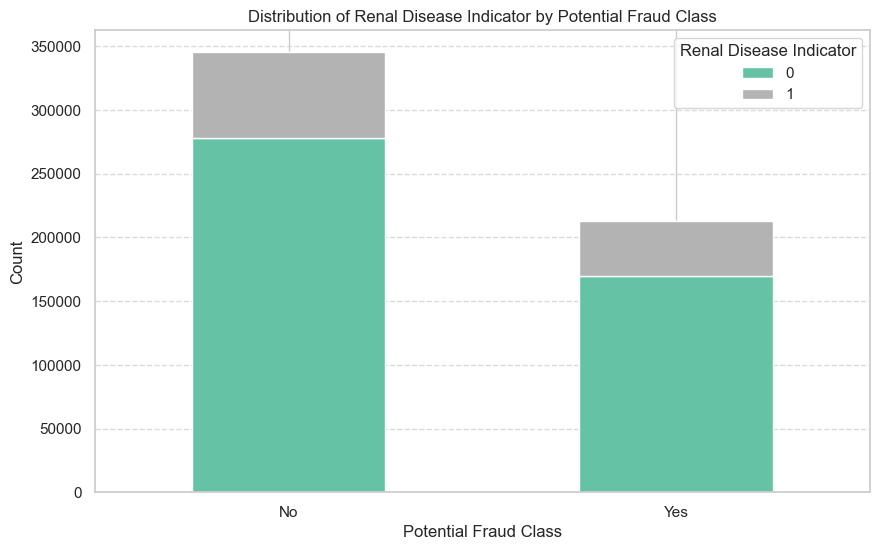

In [96]:
# Create a cross-tabulation of the two columns
counts = pd.crosstab(train_merged['PotentialFraud'], train_merged['RenalDiseaseIndicator'])

# Plot the stacked bar chart
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Customizing the chart
plt.title('Distribution of Renal Disease Indicator by Potential Fraud Class')
plt.xlabel('Potential Fraud Class')
plt.ylabel('Count')
plt.legend(title='Renal Disease Indicator')
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid for readability

plt.show()

In [97]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   BeneID                                 558211 non-null  object 
 1   ClaimID                                558211 non-null  object 
 2   Provider                               558211 non-null  object 
 3   InscClaimAmtReimbursed                 558211 non-null  int64  
 4   AttendingPhysician                     556703 non-null  object 
 5   OperatingPhysician                     114447 non-null  object 
 6   OtherPhysician                         199736 non-null  object 
 7   ClmAdmitDiagnosisCode                  558211 non-null  object 
 8   DeductibleAmtPaid                      558211 non-null  int64  
 9   DiagnosisGroupCode                     558211 non-null  object 
 10  IsMale                                 558211 non-null  

## State

In [98]:
train_merged['State'].value_counts(dropna=False)

State
5     51350
10    39073
33    35024
45    34022
14    24417
39    24251
23    21343
36    21291
34    18905
11    17003
31    15940
49    14997
44    14418
15    14213
22    13624
26    12911
50    11740
21    11261
42    10491
18    10322
1     10240
52     9792
3      9344
19     7917
24     7726
4      7571
16     7457
6      7200
37     6990
25     6682
7      5617
38     5518
17     4884
51     4644
54     4233
28     4168
20     3833
32     3456
46     3381
13     2765
30     2654
43     2002
27     1995
29     1978
47     1827
12     1706
8      1530
41     1110
53     1098
35      940
2       738
9       619
Name: count, dtype: int64

### Data Transformation : Numerical codes to Abbreviations

We have state codes between 1 and 54 , with 40 and 48 missing

after doing my research , the CMS used the Social Security Administration (SSA) Geographic Codes , where its mentioned here :

https://www.cms.gov/Regulations-and-Guidance/Guidance/Transmittals/downloads/R62SOMA.pdf

According to that pdf :

| Code | State                 | Code | State                 | Code | State               |
|-----|------------------------|------|------------------------|------|---------------------|
| 01  | Alabama               | 02   | Alaska                | 03   | Arizona             |
| 04  | Arkansas              | 05   | California            | 06   | Colorado            |
| 07  | Connecticut           | 08   | Delaware              | 09   | District of Columbia |
| 10  | Florida               | 11   | Georgia               | 12   | Hawaii              |
| 13  | Idaho                 | 14   | Illinois              | 15   | Indiana             |
| 16  | Iowa                  | 17   | Kansas                | 18   | Kentucky            |
| 19  | Louisiana             | 20   | Maine                 | 21   | Maryland            |
| 22  | Massachusetts         | 23   | Michigan              | 24   | Minnesota           |
| 25  | Mississippi           | 26   | Missouri              | 27   | Montana             |
| 28  | Nebraska              | 29   | Nevada                | 30   | New Hampshire       |
| 31  | New Jersey            | 32   | New Mexico            | 33   | New York            |
| 34  | North Carolina        | 35   | North Dakota          | 36   | Ohio                |
| 37  | Oklahoma              | 38   | Oregon                | 39   | Pennsylvania        |
| *40 | Puerto Rico           | 41   | Rhode Island          | 42   | South Carolina      |
| 43  | South Dakota          | 44   | Tennessee             | 45   | Texas               |
| 46  | Utah                  | 47   | Vermont               | *48  | Virgin Islands      |
| 49  | Virginia              | 50   | Washington            | 51   | West Virginia       |
| 52  | Wisconsin             | 53   | Wyoming               | *54  | Other               |

(*) with Puerto Rico (40) and Virgin Islands (48) missing from our data , and 54 not mentioned in the pdf , we will assume that code 54 is used for Others

In [99]:
# Validated SSA State Code Map for CMS 2010 Data
ssa_state_map = {
    1: 'AL', 2: 'AK', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC',
    10: 'FL', 11: 'GA', 12: 'HI', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'IA', 17: 'KS',
    18: 'KY', 19: 'LA', 20: 'ME', 21: 'MD', 22: 'MA', 23: 'MI', 24: 'MN', 25: 'MS',
    26: 'MO', 27: 'MT', 28: 'NE', 29: 'NV', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NY',
    34: 'NC', 35: 'ND', 36: 'OH', 37: 'OK', 38: 'OR', 39: 'PA', 41: 'RI', 42: 'SC',
    43: 'SD', 44: 'TN', 45: 'TX', 46: 'UT', 47: 'VT', 49: 'VA', 50: 'WA', 51: 'WV',
    52: 'WI', 53: 'WY', 54: 'Other'
}

train_merged['State'] = train_merged['State'].replace(ssa_state_map)

In [100]:
train_merged['State'].describe(include='all')

count     558211
unique        52
top           CA
freq       51350
Name: State, dtype: object

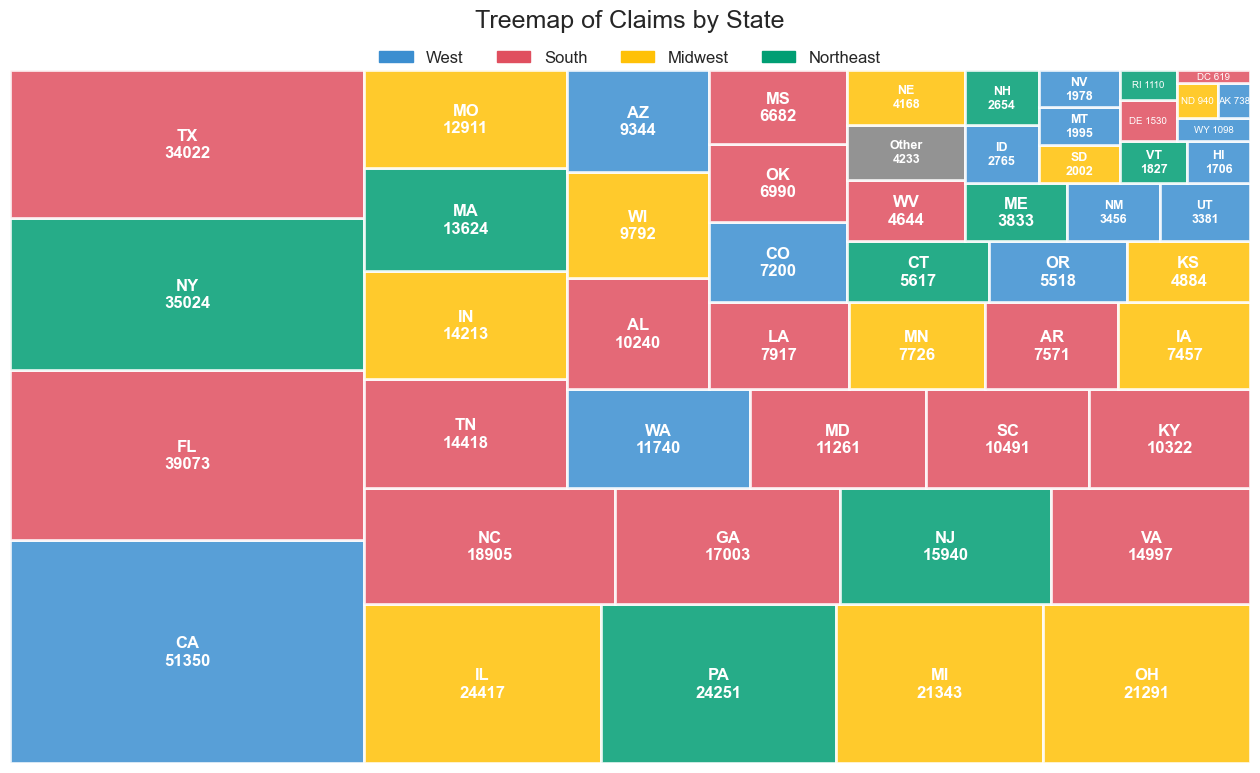

In [101]:
# Tree Map Visualization

# 1. Data Prep
state_counts = train_merged['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# 2. Define Colors by Region
region_map = {
    'West': ['CA', 'OR', 'WA', 'NV', 'ID', 'UT', 'AZ', 'MT', 'WY', 'CO', 'NM', 'AK', 'HI'],
    'Midwest': ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'MI', 'IN', 'OH'],
    'South': ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'FL', 'GA', 'SC', 'NC', 'VA', 'WV', 'DC', 'MD', 'DE'],
    'Northeast': ['PA', 'NJ', 'NY', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME']
}
state_to_region = {state: region for region, states in region_map.items() for state in states}
region_colors = {
    'West': '#3B8ED0', 'South': '#E04F5F', 'Midwest': '#FFC107',
    'Northeast': '#009E73', 'Unknown': '#808080'
}
colors = [region_colors.get(state_to_region.get(s, 'Unknown'), 'Unknown') for s in state_counts['State']]

# 3. Setup Plot
plt.figure(figsize=(16, 9))

# 4. Plot Rectangles ONLY (No labels yet)
ax = squarify.plot(
    sizes=state_counts['Count'],
    label=None,
    color=colors,
    alpha=0.85,
    pad=0,
    norm_x=100,
    norm_y=100,
    edgecolor='white',
    linewidth=2
)

# 5. Smart Labeling Loop (Dynamic Text formatting)
rects = ax.patches

# ZIP parameters: The rectangles, the State names, and the Counts
for rect, state, count in zip(rects, state_counts['State'], state_counts['Count']):
    w = rect.get_width()
    h = rect.get_height()
    x = rect.get_x() + w / 2
    y = rect.get_y() + h / 2

    # --- LOGIC ---
    if w < 5 or h < 5: # Slightly raised threshold to catch DC/AK
        font_size = 7
        font_weight = 'normal'
        # KEY CHANGE: Use space instead of newline for tiny boxes
        label_text = f"{state} {count}"
    elif w < 8 or h < 8:
        font_size = 9
        font_weight = 'bold'
        label_text = f"{state}\n{count}"
    else:
        font_size = 12
        font_weight = 'bold'
        label_text = f"{state}\n{count}"

    plt.text(
        x, y,
        label_text,
        va='center', ha='center',
        fontsize=font_size,
        color='white',
        fontweight=font_weight
    )

# Legend & Title
handles = [plt.Rectangle((0,0),1,1, color=c) for c in region_colors.values() if c != '#808080']
plt.legend(handles, region_colors.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, frameon=False, fontsize=12)
plt.title('Treemap of Claims by State', fontsize=18, y=1.05)
plt.axis('off')

plt.show()

## County

In [102]:
train_merged['County'].nunique()

314

In [103]:
train_merged['County'].value_counts(dropna=False).head()

County
200    15957
10     13982
20     12632
470    12278
60     11995
Name: count, dtype: int64

In [104]:
# How many County State Combination do we have ??
train_merged[['County','State']].value_counts().shape[0]

3106

### Data Transformation : Numerical codes to Actual Names

after looking at the county column , I decided to search up the cms.gov/ if i can find what coding did they use for the counties , I found this page :

Files for FY 2011 Final Rule and Correction Notice
https://www.cms.gov/medicare/medicare-fee-for-service-payment/acuteinpatientpps/acute-inpatient-files-for-download-items/cms1255464

which includes
- County to CBSA Crosswalk File: This file lists the CBSA, SSA county code and FIPS county code for all counties. Any changes to the CBSAs through March 2010 have been incorporated. It also contains the old MSA (based on 1990 census data) and old MSA name to which each county was assigned prior to the implementation of CBSAs in FY 2005.

which can be downloaded from :
https://www.cms.gov/medicare/medicare-fee-for-service-payment/acuteinpatientpps/downloads/fy_11_fr_county_to_cbsa_xwalk.zip

I will use this file and the State column we have to transform this column

Our codes use the last 3 digits of the SSACD column

In [105]:
# 1. Load the Crosswalk File
# We use sep='\t' because it is a tab-separated text file
crosswalk_path = '../docs/FY_11_FR_County_to_CBSA_Xwalk.txt'
df_crosswalk = pd.read_csv(crosswalk_path, sep='\t', encoding='latin1')

# 2. Clean the SSA Code Column
# The file likely loaded SSACD as floats (e.g., 5200.0). We need 5-digit strings (05200).
df_crosswalk['SSACD'] = pd.to_numeric(df_crosswalk['SSACD'], errors='coerce') # Handle errors
df_crosswalk = df_crosswalk.dropna(subset=['SSACD']) # Drop bad lines
df_crosswalk['SSACD_Clean'] = df_crosswalk['SSACD'].astype(int).astype(str).str.zfill(5)

# 3. Create the Merge Key (Last 3 Digits)
# Your 'County' column corresponds to the last 3 digits of the SSA Code
df_crosswalk['County_Key'] = df_crosswalk['SSACD_Clean'].str[-3:].astype(int)

# 4. Merge with your Main Data
# We match on both 'State' and the new 'County_Key'
# assuming your main dataframe is named 'train_merged'
train_merged = pd.merge(
    train_merged,
    df_crosswalk[['State', 'County_Key', 'County']], # Keep only necessary cols
    left_on=['State', 'County'],      # Your columns
    right_on=['State', 'County_Key'], # Crosswalk columns
    how='left'
)

# 5. Cleanup
# Rename the new column to something useful and drop the key
train_merged.rename(columns={'County_y': 'County_Name', 'County_x': 'County_Code'}, inplace=True)
train_merged.drop(columns=['County_Key'], inplace=True)



In [106]:
# Define your manual mapping dictionary
fill_map = {
    'Other': 'Other',
    'NH': 'HILLSBOROUGH',
    'AK': 'ANCHORAGE',
    'VA': 'FAIRFAX',
    'CA': 'LOS ANGELES',
    'IL': 'COOK'
}

# Loop through and apply the fill only where County is NaN
for state, county_name in fill_map.items():
    # Condition: State matches AND County Name is Null
    mask = (train_merged['State'] == state) & (train_merged['County_Name'].isna())
    train_merged.loc[mask, 'County_Name'] = county_name

# Check the results
print(train_merged[train_merged['State'].isin(fill_map.keys())]['County_Name'].value_counts(dropna=False).head(10))

County_Name
LOS ANGELES       12813
COOK               8979
SAN DIEGO          5087
ORANGE             4408
Other              4233
RIVERSIDE          2606
SANTA CLARA        2386
SACRAMENTO         2196
SAN BERNARDINO     1834
DU PAGE            1739
Name: count, dtype: int64


In [107]:
train_merged.drop(columns=['County_Code'], inplace=True)

## ChronicCond Columns

ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,
ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,
ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,
ChronicCond_rheumatoidarthritis,ChronicCond_stroke

In [108]:
chronic_cols = [
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'
]

# The result will have 1 and 2 as the index (rows)
counts_chronic = train_merged[chronic_cols].apply(pd.Series.value_counts,dropna=False)

display(counts_chronic)

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
1,224327,329583,229984,84505,174681,242714,393759,423830,177314,173699,56781
2,333884,228628,328227,473706,383530,315497,164452,134381,380897,384512,501430


after doing my research , I found that according to CMS Linkable 2008–2010 Medicare Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF) :

https://www.cms.gov/files/document/de-10-codebook.pdf-0

In page 27-37 it was mentioned that those 11 columns were mapped as follows:
- Label Yes was Coded to '1'
- Label No was Coded to '2'

for easier modeling and encoding for next steps , we will label No as 0

In [109]:
# the replacement (Map 2 to 0)
# This modifies the actual DataFrame 'df'
train_merged[chronic_cols] = train_merged[chronic_cols].replace(2, 0)

# Display the new counts to confirm
# The rows will now be 0, 1 (instead of 1, 2, NaN)
counts_df = train_merged[chronic_cols].apply(pd.Series.value_counts, dropna=False)

display(counts_df)

,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,333884,228628,328227,473706,383530,315497,164452,134381,380897,384512,501430
1,224327,329583,229984,84505,174681,242714,393759,423830,177314,173699,56781


## PotentialFraud (Target Variable)

In [110]:
vc = train_merged['PotentialFraud'].value_counts(dropna=False)
result = pd.DataFrame({
    'count': vc,
    'percentage': (vc / vc.sum() * 100).round(2).astype(str) + '%'
})
result

,count,percentage
PotentialFraud,,
No,345415,61.88%
Yes,212796,38.12%


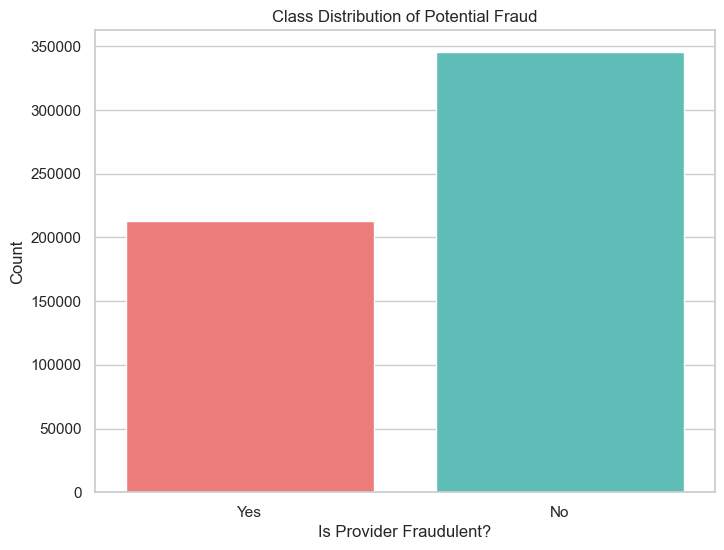

In [111]:
# Visualize Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_merged, x='PotentialFraud', palette={'Yes': '#ff6b6b', 'No': '#4ecdc4'})
plt.title('Class Distribution of Potential Fraud')
plt.xlabel('Is Provider Fraudulent?')
plt.ylabel('Count')
plt.show()

In [112]:
train_merged['PotentialFraud'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [113]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   BeneID                                 558211 non-null  object 
 1   ClaimID                                558211 non-null  object 
 2   Provider                               558211 non-null  object 
 3   InscClaimAmtReimbursed                 558211 non-null  int64  
 4   AttendingPhysician                     556703 non-null  object 
 5   OperatingPhysician                     114447 non-null  object 
 6   OtherPhysician                         199736 non-null  object 
 7   ClmAdmitDiagnosisCode                  558211 non-null  object 
 8   DeductibleAmtPaid                      558211 non-null  int64  
 9   DiagnosisGroupCode                     558211 non-null  object 
 10  IsMale                                 558211 non-null  

In [114]:
# Calculate the number of null values
null_sum = train_merged.isnull().sum()

# Calculate the percentage of null values
null_pct = (train_merged.isnull().sum() / len(train_merged)) * 100

# Calculate the number of unique values
nunique = train_merged.nunique()

# Combine these into a single DataFrame for a clean view
summary_df = pd.DataFrame({
    'Null Count': null_sum,
    'Null Percentage': null_pct,
    'Unique Values': nunique ,
})

# Display the summary
print(summary_df)

                                       Null Count  Null Percentage  \
BeneID                                          0         0.000000   
ClaimID                                         0         0.000000   
Provider                                        0         0.000000   
InscClaimAmtReimbursed                          0         0.000000   
AttendingPhysician                           1508         0.270149   
OperatingPhysician                         443764        79.497538   
OtherPhysician                             358475        64.218548   
ClmAdmitDiagnosisCode                           0         0.000000   
DeductibleAmtPaid                               0         0.000000   
DiagnosisGroupCode                              0         0.000000   
IsMale                                          0         0.000000   
RenalDiseaseIndicator                           0         0.000000   
State                                           0         0.000000   
NoOfMonths_PartACov 

In [115]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   BeneID                                 558211 non-null  object 
 1   ClaimID                                558211 non-null  object 
 2   Provider                               558211 non-null  object 
 3   InscClaimAmtReimbursed                 558211 non-null  int64  
 4   AttendingPhysician                     556703 non-null  object 
 5   OperatingPhysician                     114447 non-null  object 
 6   OtherPhysician                         199736 non-null  object 
 7   ClmAdmitDiagnosisCode                  558211 non-null  object 
 8   DeductibleAmtPaid                      558211 non-null  int64  
 9   DiagnosisGroupCode                     558211 non-null  object 
 10  IsMale                                 558211 non-null  

In [116]:
train_merged.describe(include='all')

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,IsMale,RenalDiseaseIndicator,State,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,IsInpatient,IsPostDischargeBilling,ClaimDurationDays,Age,IsDead,ClmDiagnosisCount,ClmProceduresCount,Congenital Anomalies,Diseases Of The Circulatory System,Diseases Of The Digestive System,Diseases Of The Genitourinary System,Diseases Of The Nervous System,Diseases Of The Respiratory System,Diseases Of The Skin,Infectious And Parasitic Diseases,"Injury, Poisoning & External Causes",Mental Disorders,Musculoskeletal & Connective Tissue,Neoplasms,"Pregnancy, Childbirth & Perinatal",Procedures & Surgeries,Supplementary Factors (V-Codes),"Symptoms, Signs, And Ill-Defined","Systemic, Metabolic & Blood Disorders",UnknownCodesCount,IsFemale,IsWhiteRace,IsBlackRace,IsHispanicRace,IsOtherRace,County_Name
count,558211,558211,558211,558211.000000,556703,114447,199736,558211,558211.000000,558211,558211.000000,558211.000000,558211,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211
unique,138556,558211,5410,NaN,82063,35315,46457,17,NaN,737,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770
top,BENE59303,CLM46614,PRV51459,NaN,PHY330576,PHY330576,PHY412132,Unknown,NaN,Not applicable,NaN,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOS ANGELES
freq,29,1,8240,NaN,2534,424,1247,412312,NaN,517737,NaN,NaN,51350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12813
mean,NaN,NaN,NaN,997.012133,NaN,NaN,NaN,NaN,80.014804,NaN,0.421162,0.196786,NaN,11.931472,11.93877,0.401868,0.590427,0.412002,0.151385,0.312930,0.434807,0.705395,0.759265,0.317647,0.311171,0.101720,5227.971466,568.756807,2278.225348,649.698745,0.381211,0.072507,0.000030,1.728363,73.817936,0.007400,3.010897,0.053557,0.006103,0.573756,0.137715,0.172818,0.124129,0.140142,0.051352,0.037593,0.134637,0.121322,0.311128,0.108405,0.001229,0.000075,0.522362,0.354567,0.481932,0.046558,0.578838,0.843831,0.099676,0.021175,0.035318,NaN
std,NaN,NaN,NaN,3821.534891,NaN,NaN,NaN,NaN,276.656578,NaN,0.493746,0.397569,NaN,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,0.485685,0.259325,0.005518,4.906205,13.015420,0.085707,2.448213,0.280534,0.081615,0.960183,0.473680,0.484724,0.410411,0.455386,0.279139,0.213918,0.526187,0.425030,0.725720,0.402325,0.055204,0.008674,0.795096,0.666224,0.805566,0.260303,0.493746,0.363015,0.299567,0.143967,

# Aggregation strategy